# 1. Packages to Import

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import nltk
import matplotlib.pyplot as plt
import os

# 2. Load and Analyse data

In [3]:
data = pd.read_csv('train.tsv', sep='\t')

print("Meta data: ")
print(data.info())

print("Data per class: ")
print(data['Sentiment'].value_counts())

Meta data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None
Data per class: 
2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [4]:
sentiment_count = data.groupby('Sentiment').count()
sentiment_count

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


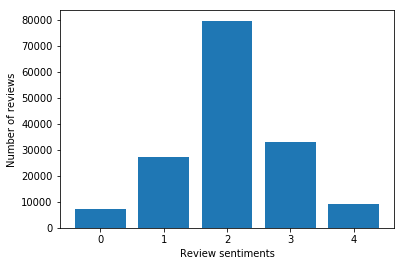

In [5]:
plt.bar(sentiment_count.index.values, sentiment_count['Phrase'])
plt.xlabel('Review sentiments')
plt.ylabel('Number of reviews')
plt.show()

In [6]:
print("First 10 rows of data: ")
data.head(10)

First 10 rows of data: 


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [7]:
chdata = data.drop(['PhraseId'], axis=1)
chdata.head()

,SentenceId,Phrase,Sentiment
0,1,A series of escapades demonstrating the adage ...,1
1,1,A series of escapades demonstrating the adage ...,2
2,1,A series,2
3,1,A,2
4,1,series,2


# 3. Examining NLTK functions

Sentence Tokenization:  ['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'] 

Word Tokenization:  ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.'] 

Frequency:  <FreqDist with 28 samples and 37 outcomes>
[('of', 4), ('the', 3)]


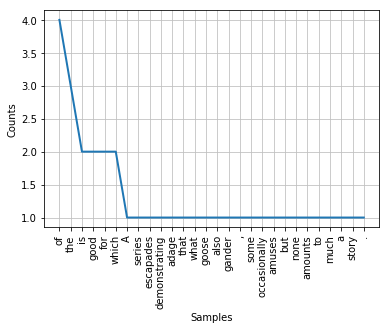

In [8]:
# taking a sample of the text to perform analysis
text = chdata.iloc[0, 1]

# sentence tokenization of text
sentence = nltk.tokenize.sent_tokenize(text)
print("Sentence Tokenization: ", sentence, "\n")

# word tokenization of text
word = nltk.tokenize.word_tokenize(text)
print("Word Tokenization: ", word, "\n")

# frequency distribution
fdist = nltk.probability.FreqDist(word)
print("Frequency: ", fdist)
print(fdist.most_common(2))

# plotting the word frequency
fdist.plot(30, cumulative=False)

First 10 Stop words:  ['themselves', 'the', 'because', 'be', 'by', 'she', 'have', 'shouldn', 'those', 'mightn']
Before stoppers:  ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.']
After removing stoppers:  ['A', 'series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', ',', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story', '.']
Plotting after removing stop words:


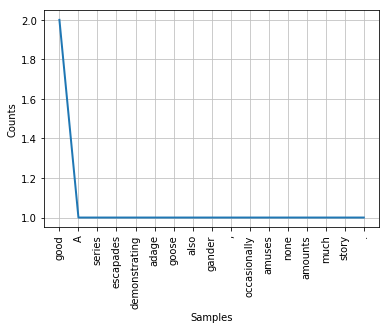

In [9]:
stopper = list(set(nltk.corpus.stopwords.words("english")))
print("First 10 Stop words: ", stopper[:10])

filtered = []

for w in word:
    if w not in stopper:
        filtered.append(w)

print("Before stoppers: ", word)
print("After removing stoppers: ", filtered)

after_stem = nltk.probability.FreqDist(filtered)
print("Plotting after removing stop words:")
after_stem.plot(30, cumulative=False)

In [10]:
# performing text normalization
# stemming
ps = nltk.stem.PorterStemmer()

stemmed = []
for w in filtered:
    stemmed.append(ps.stem(w))

print("After performing stemmings: ", stemmed)

# lemmatization - a dictionary look up
lem = nltk.stem.wordnet.WordNetLemmatizer()

lemmaed = []
for w in filtered:
    lemmaed.append(lem.lemmatize(w))

print("After performing lemmatization: ", lemmaed)

# applying pos tagging
postag = nltk.pos_tag(nltk.word_tokenize(text))
print("The resulting POS tagging:")
print(postag)

After performing stemmings:  ['A', 'seri', 'escapad', 'demonstr', 'adag', 'good', 'goos', 'also', 'good', 'gander', ',', 'occasion', 'amus', 'none', 'amount', 'much', 'stori', '.']
After performing lemmatization:  ['A', 'series', 'escapade', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', ',', 'occasionally', 'amuses', 'none', 'amount', 'much', 'story', '.']
The resulting POS tagging:
[('A', 'DT'), ('series', 'NN'), ('of', 'IN'), ('escapades', 'NNS'), ('demonstrating', 'VBG'), ('the', 'DT'), ('adage', 'NN'), ('that', 'IN'), ('what', 'WP'), ('is', 'VBZ'), ('good', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('goose', 'NN'), ('is', 'VBZ'), ('also', 'RB'), ('good', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('gander', 'NN'), (',', ','), ('some', 'DT'), ('of', 'IN'), ('which', 'WDT'), ('occasionally', 'RB'), ('amuses', 'VBZ'), ('but', 'CC'), ('none', 'NN'), ('of', 'IN'), ('which', 'WDT'), ('amounts', 'NNS'), ('to', 'TO'), ('much', 'JJ'), ('of', 'IN'), ('a', 'DT'), ('story', 'NN'), 

In [11]:
lem.lemmatize(text)

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

# 4. Reducing the corpus size

In [12]:
# function to collect the word corpus 
def collect_words(df, feature):
    all_words = []
    
    for f in df[feature]:
        wordlis = nltk.tokenize.word_tokenize(f)
        
        for word in wordlis:
            if word not in stopper:
                lemstr = lem.lemmatize(word)
                stemstr = ps.stem(word)
                # collect all the words
                all_words.append(stemstr)
            
    return all_words


corpus = collect_words(chdata, 'Phrase')
len(corpus)

729049

In [13]:
corpus[:10]

['A',
 'seri',
 'escapad',
 'demonstr',
 'adag',
 'good',
 'goos',
 'also',
 'good',
 'gander']

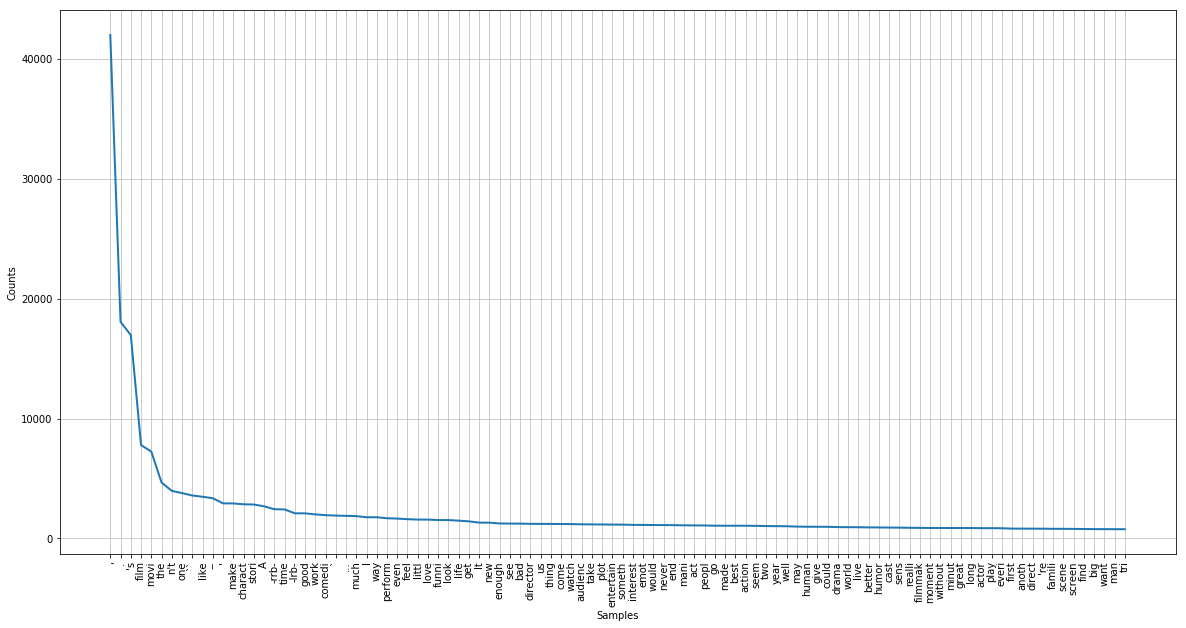

In [14]:
plt.figure(figsize=(20, 10))
corpus_freq = nltk.probability.FreqDist(corpus)
corpus_freq.plot(100, cumulative=False)

In [15]:
corpus_freq.most_common(5)

[(',', 42006), ('.', 18075), ("'s", 16971), ('film', 7787), ('movi', 7250)]

In [16]:
# function to collect all the words above and below threshold
def collect_threshold(freqd, mini_count=10, maxi_count=2000):

    high_words = freqd.copy()
    low_words = freqd.copy()
    
    for key in freqd.keys():
        if freqd[key] < maxi_count:
            del(high_words[key])
        if freqd[key] > mini_count:
            del(low_words[key])
            
    return high_words, low_words

# the newly obtained keys will then be used for further filtering
higher, lower = collect_threshold(corpus_freq)

print("Number of filtered words: ", len(higher.keys()), len(lower.keys()))

Number of filtered words:  21 4050


In [17]:
higher.keys()

dict_keys(['A', 'good', ',', 'stori', '.', "'s", 'work', 'time', 'one', 'charact', 'the', 'like', "n't", 'movi', '--', 'make', '``', 'film', "'", '-lrb-', '-rrb-'])

# 5. Feature Engineering

In [18]:
def cleaned_up(df, feature, high_words, low_words, stopper=stopper, lem=lem):
    
    new_text = []
    all_words = []
    
    for f in df[feature]:
        # list for words
        cl = []
        # words to string
        cls = ""
        
        wordlis = nltk.tokenize.word_tokenize(f)
        
        # performing lemmatization and stop words removal
        for st in wordlis:
            if st not in stopper:
                lemstr = lem.lemmatize(st)
                stemstr = ps.stem(lemstr)
            
            if stemstr not in high_words and stemstr not in low_words:
                # collect all the words
                all_words.append(stemstr)
                # collect words that are filtered
                cl.append(stemstr)
        
        if len(cl) == 0:
            cls = ""
        
        else:
            cls = cl[0]
            for st in range(1, len(cl)):
                cls = cls + " " + cl[st]
                
        new_text.append(cls)
    
    return new_text, all_words

cleaned_text, full_set = cleaned_up(data, 'Phrase', higher, lower)
#data = data.drop(columns=['PhraseId'])

In [19]:
cleaned_text[:10]

['seri seri escapad demonstr demonstr adag adag adag adag goos goos also occasion amus amus none none none amount amount much much much',
 'seri seri escapad demonstr demonstr adag adag adag adag goos',
 'seri',
 '',
 'seri',
 'seri escapad demonstr demonstr adag adag adag adag goos',
 'goos',
 'escapad demonstr demonstr adag adag adag adag goos',
 'escapad',
 'demonstr demonstr adag adag adag adag goos']

In [20]:
data['cleaned_text'] = cleaned_text
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_text
0,1,1,A series of escapades demonstrating the adage ...,1,seri seri escapad demonstr demonstr adag adag ...
1,2,1,A series of escapades demonstrating the adage ...,2,seri seri escapad demonstr demonstr adag adag ...
2,3,1,A series,2,seri
3,4,1,A,2,
4,5,1,series,2,seri
5,6,1,of escapades demonstrating the adage that what...,2,seri escapad demonstr demonstr adag adag adag ...
6,7,1,of,2,goos
7,8,1,escapades demonstrating the adage that what is...,2,escapad demonstr demonstr adag adag adag adag ...
8,9,1,escapades,2,escapad
9,10,1,demonstrating the adage that what is good for ...,2,demonstr demonstr adag adag adag adag goos


Total number of words after all filteration: 


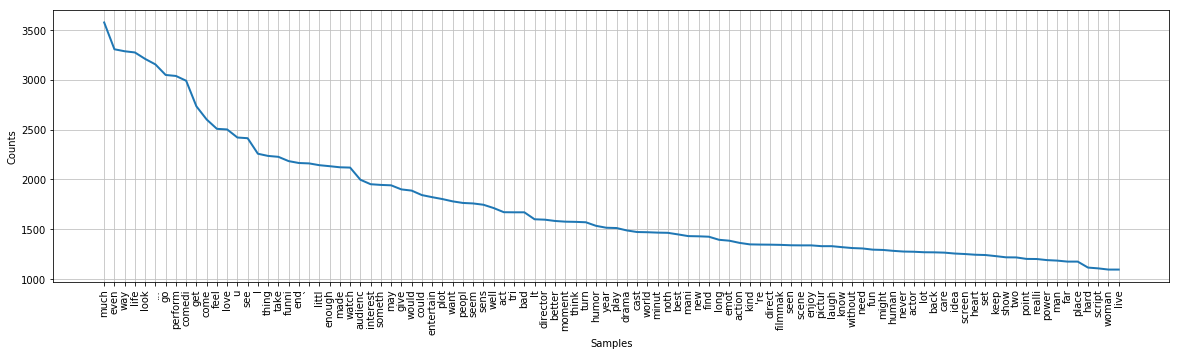

In [21]:
# plotting the final frequency plot of all the filtered words
plotting = nltk.probability.FreqDist(full_set)
print("Total number of words after all filteration: ", )
plt.figure(figsize=(20, 5))
plotting.plot(100, cumulative=False)

In [22]:
def getclass(df, uqv, minval):
    filt = data['Sentiment'] == uqv
    filtidx = []
    
    for idx in range(len(filt)):
        if filt[idx] == True:
            filtidx.append(idx)
            
    filtset = np.random.choice(filtidx, mini, replace=False)
    df = data.iloc[filtset, :]
    
    print(uqv, df.shape)
    return df

In [23]:
# evening out the samples, making sure that each class has equal number of samples!
uqval = data['Sentiment'].value_counts()
mini = min(uqval)
res = []

for i in range(len(uqval)):
    m = getclass(data, uqval.index[i], mini)
    res.append(m)

2 (7072, 5)
3 (7072, 5)
1 (7072, 5)
4 (7072, 5)
0 (7072, 5)


In [24]:
fin = pd.concat(res, axis=0)
fin.head()

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_text
129810,129811,6986,in its own tangled plot,2,tangl plot
48959,48960,2390,so different from The Apple,2,appl differ differ appl
21099,21100,944,mind all that ; the boobs are fantasti,2,mind mind mind ; ; boob boob
93405,93406,4870,to do something different over actually pullin...,2,pull pull someth differ differ actual pull pul...
59822,59823,3017,a new career ahead of him,2,ahead new career ahead ahead ahead


# 6. Classical NLP Encoding

In [25]:
# building the document term matrix (a vectorization process)
token = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z0-9]+')
text_cv = sk.feature_extraction.text.CountVectorizer(lowercase=True,
                stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
dtm = text_cv.fit_transform(data['cleaned_text'])
dtm.shape

(156060, 7459)

In [26]:
# building the tf-idf model (tf * log(#doc/ #term-docs))
text_tf = sk.feature_extraction.text.TfidfVectorizer()
tf = text_tf.fit_transform(data['cleaned_text'])
tf.shape

(156060, 7615)

In [27]:
dtm_eq = text_cv.fit_transform(fin['cleaned_text'])
dtm_eq.shape

(35360, 7320)

In [28]:
tf_eq = text_tf.fit_transform(fin['cleaned_text'])
tf_eq.shape

(35360, 7477)

# 7. FNN - PyTorch

In [29]:
def onehot(target):
    onehot_encode = sk.preprocessing.OneHotEncoder()
    change = np.array(target).reshape(-1, 1)
    onehot_class = onehot_encode.fit_transform(change).toarray()
    return onehot_class

In [30]:
targ = onehot(data['Sentiment'])
targ.shape

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(156060, 5)

In [31]:
targ_eq = onehot(fin['Sentiment'])
targ_eq.shape

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(35360, 5)

In [32]:
def models(values, labels):
    # Hyperparameters for our network
    input_size = values.shape[1]
    hidden_sizes = [5000, 500, 50]
    output_size = labels.shape[1]

    # Build a feed-forward network
    model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes[0]),
                          torch.nn.ReLU(),
                          torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                          torch.nn.ReLU(),
                          torch.nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                          torch.nn.ReLU(),
                          torch.nn.Linear(hidden_sizes[2], output_size),
                          torch.nn.Sigmoid())
    
    print("Model structure:")
    print(model)
    return model

In [40]:
from sklearn.metrics import confusion_matrix
def apply_confusion(a1, a2):
    
    a1_arr = np.array(a1).reshape(-1, 5)
    a2_arr = np.array(a2).reshape(-1, 5)
    
    # predicted winner
    z1 = np.zeros(a1_arr.shape[0]).reshape(-1, 1)
    # expected winner
    z2 = np.zeros(a2_arr.shape[0]).reshape(-1, 1)

    for i in range(a1_arr.shape[0]):
        z1[i] = np.argmax(a1_arr[i])
        z2[i] = np.argmax(a2_arr[i])

    conf = confusion_matrix(z1, z2)
    print("Confusion Matrix: ")
    print(conf)
    plt.imshow(conf, cmap='gray')
    plt.show()
    
    test_acc = round(sk.metrics.accuracy_score(z1, z2) * 100, 4)
    print("Accuracy: ", test_acc, "%")
    return test_acc

In [41]:
def run_model(model, values, labels):
    
    epochs = 100
    stop_counter = 0
    early_stop = 100
    learning_rate = 1e-3
    every = 10
    threshold = 50.0
    stoc = 1000
    
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(values, labels, test_size=0.2, random_state=123)
    x_train, x_valid, y_train, y_valid = sk.model_selection.train_test_split(x_train, y_train, test_size=0.3, random_state=23)
    train_loss, valid_loss = [], []
    print("Shape of train set: ", x_train.shape, y_train.shape)
    print("Shape of valid set: ", x_valid.shape, y_valid.shape)
    print("Shape of test set: ", x_test.shape, y_test.shape)

    for t in range(1, epochs + 1):
        train_score, valid_score = 0, 0
        train_sum_loss, valid_sum_loss = 0, 0

        train_idx = np.random.choice(np.arange(0, x_train.shape[0]), stoc, replace=False)
        valid_idx = np.random.choice(np.arange(0, x_valid.shape[0]), stoc, replace=False)

        #####set the model to train mode based on the train data
        model.train()

        for i in train_idx:
            # forward pass
            inp = torch.tensor(x_train[i].toarray(), dtype=torch.float).reshape(1, -1)
            y_train_pred = model(inp)
            oup = torch.tensor(y_train[i], dtype=torch.float).reshape(1, -1)
            #print(y_train_pred.shape, oup.shape)
            
            # compute and print loss
            loss = loss_fn(y_train_pred, oup)
            # collect the loss
            train_sum_loss += loss.item()

            # backward pass
            loss.backward()
            # zero the gradient before back prop
            optimizer.zero_grad()
            # optimizer makes an update to its parameters
            optimizer.step()


        #####set the model to evaluate mode based on the validation data
        model.eval()
        valid_preds = []
        valid_actual = []
        
        for i in valid_idx:
            # forward pass
            inp = torch.tensor(x_valid[i].toarray(), dtype=torch.float).reshape(1, -1)
            y_valid_pred = model(inp)
            oup = torch.tensor(y_valid[i], dtype=torch.float).reshape(1, -1)
            
            '''if i % 10 == 0:
                print("Validation: ", i)
                print(y_valid_pred, oup)'''
            
            #for i in range(x_valid.shape[0]):
            valid_preds.append(y_valid_pred.detach().numpy())
            valid_actual.append(y_valid[i])

            # compute and print loss
            loss = loss_fn(y_valid_pred, oup)
            valid_sum_loss += loss.item()

        train_loss.append(train_sum_loss / stoc)
        valid_loss.append(valid_sum_loss / stoc)

        train_score = round((train_sum_loss / stoc) * 100, 3)
        valid_score = round((valid_sum_loss / stoc) * 100, 3)

        #if t % every == 0:
        print("Epoch ", t, (t / epochs) * 100, "% complete...")
        print("Train loss: ", train_score, "Validation score: ", valid_score)
        apply_confusion(valid_preds, valid_actual)
        print("\n")

        '''
        if valid_score < threshold:
            stop_counter += 1

            if stop_counter == early_stop:
                print("Threshold reached after ", t, " iterations!")
                print("Training Complete after Early Stop!")
                break
        '''
                
                
    print("Plotting the training and validation losses:")
    plt.figure(figsize=(15, 5))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.show()
    
    #####testing the model after training and validataion
    model.eval()
    test_preds = []
    test_actual = []
    test_sum_loss = 0

    for i in range(x_test.shape[0]):

        # forward pass with test dataset
        inp = torch.tensor(x_test[i].toarray(), dtype=torch.float).reshape(1, -1)
        test_pred = model(inp)
        out = torch.tensor(y_test[i], dtype=torch.float).reshape(1, -1)

        #for i in range(x_test.shape[0]):
        test_preds.append(test_pred[i].detach().numpy())
        test_actual.append(y_test[i])

        # compute and print loss
        loss = loss_fn(y_pred, out)
        test_sum_loss += loss.item()
        
    apply_confusion(test_preds, test_actual)
    test_avg_loss = (test_sum_loss / stoc) * 100
    print("Average test loss: ", round(test_avg_loss, 4), "%")
    
    return model

In [67]:
def run_batch(model, values, labels, lr, epo):
    
    epochs = epo
    stop_counter = 0
    early_stop = 100
    learning_rate = lr
    every = 10
    threshold = 0.05
    stoc = 5000
    acc = 0
    
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(values, labels, test_size=0.2, random_state=123)
    x_train, x_valid, y_train, y_valid = sk.model_selection.train_test_split(x_train, y_train, test_size=0.3, random_state=23)
    train_loss, valid_loss = [], []
    train_sum_loss, valid_sum_loss = 0, 0
    
    print("Shape of train set: ", x_train.shape, y_train.shape)
    print("Shape of valid set: ", x_valid.shape, y_valid.shape)
    print("Shape of test set: ", x_test.shape, y_test.shape)

    for t in range(1, epochs + 1):

        train_idx = np.random.choice(np.arange(0, x_train.shape[0]), stoc, replace=False)
        valid_idx = np.random.choice(np.arange(0, x_valid.shape[0]), stoc, replace=False)

        #####set the model to train mode based on the train data
        model.train()

        # forward pass
        inp = torch.tensor(x_train[train_idx].toarray(), dtype=torch.float).reshape(train_idx.shape[0], -1)
        y_train_pred = model(inp)
        oup = torch.tensor(y_train[train_idx], dtype=torch.float).reshape(train_idx.shape[0], -1)
        #print(y_train_pred.shape, oup.shape)

        # compute and print loss
        loss = loss_fn(y_train_pred, oup)
        # collect the loss
        train_sum_loss += loss.item()
        train_loss.append(train_sum_loss / t)
        train_score = loss.item()
        
        # backward pass
        loss.backward()
        # optimizer makes an update to its parameters
        optimizer.step()
        # zero the gradient before back prop
        optimizer.zero_grad()

        #####set the model to evaluate mode based on the validation data
        model.eval()
        valid_preds = []
        valid_actual = []
        
        # forward pass
        inp = torch.tensor(x_valid[valid_idx].toarray(), dtype=torch.float).reshape(valid_idx.shape[0], -1)
        valid_pred = model(inp)
        oup = torch.tensor(y_valid[valid_idx], dtype=torch.float).reshape(valid_idx.shape[0], -1)

        # compute and print loss
        loss = loss_fn(valid_pred, oup)
        valid_sum_loss += loss.item()
        valid_loss.append(valid_sum_loss / t)
        valid_score = loss.item()

        if t % every == 0:
            print("Epoch ", t, (t / epochs) * 100, "% complete...")
            print("Train loss: ", train_score, "Validation score: ", valid_score)
            print(valid_pred.shape, oup.shape)
    
            for i in range(valid_idx.shape[0]):
                valid_preds.append(valid_pred[i].detach().numpy())
                valid_actual.append(y_valid[i])
            acc = apply_confusion(valid_preds, valid_actual)
            print("\n")
            
            if np.abs(train_score - valid_score) > threshold:
                print("Threshold reached after ", t, " iterations!")
                print("Training Complete after Early Stop!")
                break
                
                
    print("Plotting the training and validation losses:")
    plt.figure(figsize=(15, 5))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.show()
    
    #####testing the model after training and validataion
    model.eval()
    test_preds = []
    test_actual = []
    test_loss = 0

    # forward pass with test dataset
    inp = torch.tensor(x_test.toarray(), dtype=torch.float).reshape(x_test.shape[0], -1)
    test_pred = model(inp)
    oup = torch.tensor(y_test, dtype=torch.float).reshape(x_test.shape[0], -1)

    # compute and print loss
    loss = loss_fn(test_pred, oup)
    print("Test loss: ", loss.item())
    
    for i in range(x_test.shape[0]):
        test_preds.append(test_pred[i].detach().numpy())
        test_actual.append(y_test[i])
        
    apply_confusion(test_preds, test_actual)
    
    return model

In [46]:
'''
def run_fulldata(model, values, labels):
    
    epochs = 100
    stop_counter = 0
    early_stop = 100
    learning_rate = 1e-1
    every = 10
    threshold = 20.0
    stoc = 1000
    
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(values, labels, test_size=0.2, random_state=123)
    x_train, x_valid, y_train, y_valid = sk.model_selection.train_test_split(x_train, y_train, test_size=0.3, random_state=23)
    train_loss, valid_loss = [], []
    print("Shape of train set: ", x_train.shape, y_train.shape)
    print("Shape of valid set: ", x_valid.shape, y_valid.shape)
    print("Shape of test set: ", x_test.shape, y_test.shape)

    for t in range(1, epochs + 1):
        train_score, valid_score = 0, 0
        train_sum_loss, valid_sum_loss = 0, 0

        train_idx = np.random.choice(np.arange(0, x_train.shape[0]), stoc, replace=False)
        valid_idx = np.random.choice(np.arange(0, x_valid.shape[0]), stoc, replace=False)

        #####set the model to train mode based on the train data
        model.train()

        for i in range(x_train.shape[0]):
            # forward pass
            inp = torch.tensor(x_train[i].toarray(), dtype=torch.float).reshape(1, -1)
            y_train_pred = model(inp)
            oup = torch.tensor(y_train[i], dtype=torch.float).reshape(1, -1)
            #print(y_train_pred, oup)
            
            
            # compute and print loss
            loss = loss_fn(y_train_pred, oup)
            # collect the loss
            train_sum_loss += loss.item()

            # backward pass
            loss.backward()
            # zero the gradient before back prop
            optimizer.zero_grad()
            # optimizer makes an update to its parameters
            optimizer.step()


        #####set the model to evaluate mode based on the validation data
        model.eval()
        valid_preds = []
        valid_actual = []
        
        for i in range(x_valid.shape[0]):
            # forward pass
            inp = torch.tensor(x_valid[i].toarray(), dtype=torch.float).reshape(1, -1)
            y_valid_pred = model(inp)
            oup = torch.tensor(y_valid[i], dtype=torch.float).reshape(1, -1)
            
            #for i in range(x_valid.shape[0]):
            valid_preds.append(y_valid_pred.detach().numpy())
            valid_actual.append(y_valid[i])

        # compute and print loss
        loss = loss_fn(y_valid_pred, oup)
        valid_sum_loss += loss.item()

        train_loss.append(train_sum_loss / x_train.shape[0])
        valid_loss.append(valid_sum_loss / x_valid.shape[0])

        train_score = round((train_sum_loss / x_train.shape[0]) * 100, 3)
        valid_score = round((valid_sum_loss / x_valid.shape[0]) * 100, 3)

        #if t % every == 0:
        print("Epoch ", t, (t / epochs) * 100, "% complete...")
        print("Train loss: ", train_score, "Validation score: ", valid_score)
        apply_confusion(valid_preds, valid_actual)
        print("\n")

        if valid_score < threshold:
            stop_counter += 1

            if stop_counter == early_stop:
                print("Threshold reached after ", t, " iterations!")
                print("Training Complete after Early Stop!")
                break
                
                
    print("Plotting the training and validation losses:")
    plt.figure(figsize=(15, 5))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.show()
    
    #####testing the model after training and validataion
    model.eval()
    test_preds = []
    test_actual = []
    test_sum_loss = 0

    for i in range(x_test.shape[0]):

        # forward pass with test dataset
        inp = torch.tensor(x_test[i].toarray(), dtype=torch.float).reshape(1, -1)
        test_pred = model(inp)
        out = torch.tensor(y_test[i], dtype=torch.float).reshape(1, -1)

        #for i in range(x_test.shape[0]):
        test_preds.append(test_pred[i].detach().numpy())
        test_actual.append(y_test[i])

        # compute and print loss
        loss = loss_fn(y_pred, out)
        test_sum_loss += loss.item()
        
    apply_confusion(test_preds, test_actual)
    test_avg_loss = (test_sum_loss / x_test.shape[0]) * 100
    print("Total average test loss: ", round(test_avg_loss, 4), "%")
    
    return model
    '''
dtm.shape, dtm_eq.shape, tf.shape, tf_eq.shape

((156060, 7459), (35360, 7320), (156060, 7615), (35360, 7477))

Model structure:
Sequential(
  (0): Linear(in_features=7459, out_features=5000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5000, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=5, bias=True)
  (7): Sigmoid()
)
Shape of train set:  (87393, 7459) (87393, 5)
Shape of valid set:  (37455, 7459) (37455, 5)
Shape of test set:  (31212, 7459) (31212, 5)
Epoch  10 2.0 % complete...
Train loss:  0.24036608636379242 Validation score:  0.23970314860343933
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


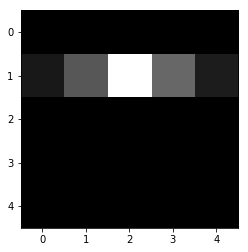

Accuracy:  17.42 %


Epoch  20 4.0 % complete...
Train loss:  0.23314277827739716 Validation score:  0.2322152853012085
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


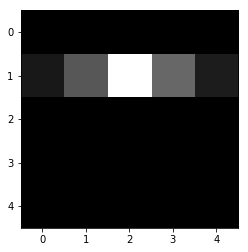

Accuracy:  17.42 %


Epoch  30 6.0 % complete...
Train loss:  0.21999841928482056 Validation score:  0.2182789295911789
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [ 236  839 2439  991  279]
 [   0    0    0    0    0]
 [   7   32  120   47   10]
 [   0    0    0    0    0]]


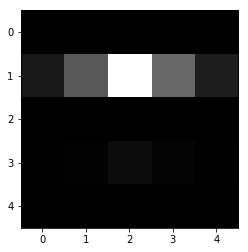

Accuracy:  17.72 %


Epoch  40 8.0 % complete...
Train loss:  0.1988697499036789 Validation score:  0.19693788886070251
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [ 162  571 1693  694  199]
 [   0    0    0    0    0]
 [  81  300  866  344   90]
 [   0    0    0    0    0]]


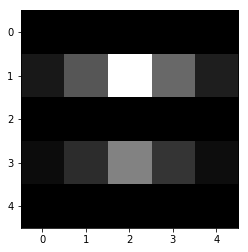

Accuracy:  18.3 %


Epoch  50 10.0 % complete...
Train loss:  0.17770551145076752 Validation score:  0.1759738177061081
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  74  201  686  265   72]
 [  31  159  430  174   64]
 [ 138  511 1443  599  153]
 [   0    0    0    0    0]]


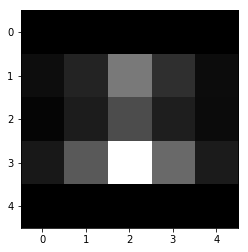

Accuracy:  24.6 %


Epoch  60 12.0 % complete...
Train loss:  0.1606803834438324 Validation score:  0.15956300497055054
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


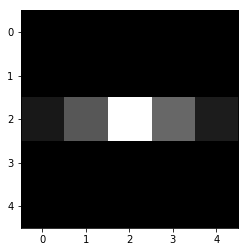

Accuracy:  51.18 %


Epoch  70 14.000000000000002 % complete...
Train loss:  0.1502501666545868 Validation score:  0.14913156628608704
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


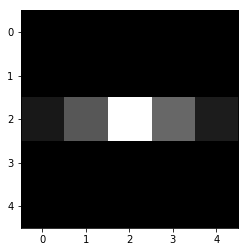

Accuracy:  51.18 %


Epoch  80 16.0 % complete...
Train loss:  0.14593607187271118 Validation score:  0.14548379182815552
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


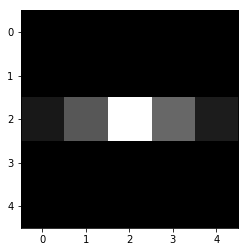

Accuracy:  51.18 %


Epoch  90 18.0 % complete...
Train loss:  0.14207614958286285 Validation score:  0.1419753134250641
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


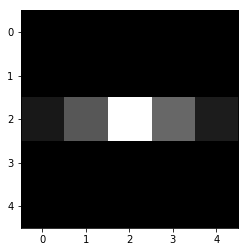

Accuracy:  51.18 %


Epoch  100 20.0 % complete...
Train loss:  0.14025184512138367 Validation score:  0.1396586298942566
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


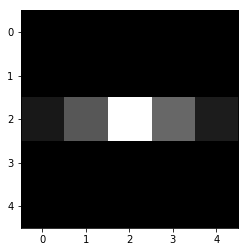

Accuracy:  51.18 %


Epoch  110 22.0 % complete...
Train loss:  0.14012469351291656 Validation score:  0.1393163651227951
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


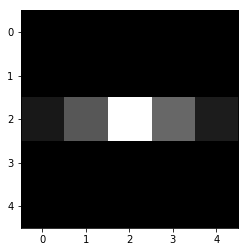

Accuracy:  51.18 %


Epoch  120 24.0 % complete...
Train loss:  0.1383744180202484 Validation score:  0.1400391012430191
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


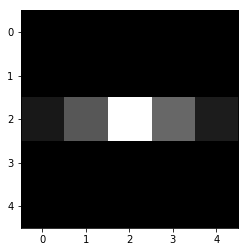

Accuracy:  51.18 %


Epoch  130 26.0 % complete...
Train loss:  0.1402062475681305 Validation score:  0.13868387043476105
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


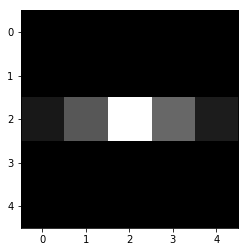

Accuracy:  51.18 %


Epoch  140 28.000000000000004 % complete...
Train loss:  0.13529589772224426 Validation score:  0.13767653703689575
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


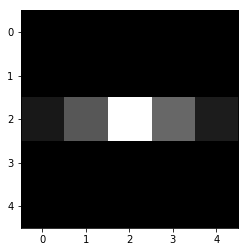

Accuracy:  51.18 %


Epoch  150 30.0 % complete...
Train loss:  0.13486000895500183 Validation score:  0.13542763888835907
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


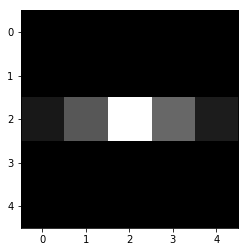

Accuracy:  51.18 %


Epoch  160 32.0 % complete...
Train loss:  0.13216353952884674 Validation score:  0.13336271047592163
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2558 1037  289]
 [   0    0    1    1    0]
 [   0    0    0    0    0]]


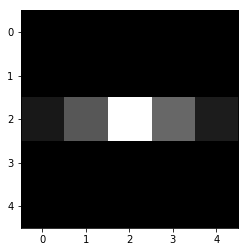

Accuracy:  51.18 %


Epoch  170 34.0 % complete...
Train loss:  0.12905775010585785 Validation score:  0.13048863410949707
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 240  846 2518 1014  275]
 [   3   25   41   24   14]
 [   0    0    0    0    0]]


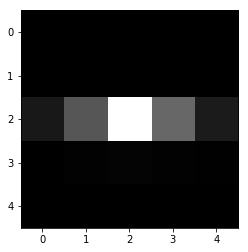

Accuracy:  50.84 %


Epoch  180 36.0 % complete...
Train loss:  0.125431627035141 Validation score:  0.1290104240179062
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 218  789 2356  961  268]
 [  25   82  203   77   21]
 [   0    0    0    0    0]]


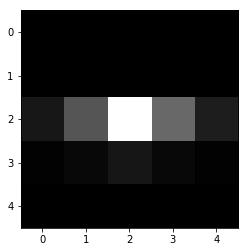

Accuracy:  48.66 %


Epoch  190 38.0 % complete...
Train loss:  0.12337379902601242 Validation score:  0.12550440430641174
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 210  767 2205  887  254]
 [  33  104  354  151   35]
 [   0    0    0    0    0]]


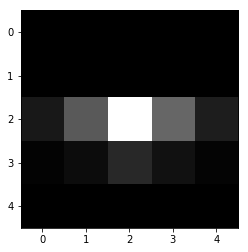

Accuracy:  47.12 %


Epoch  200 40.0 % complete...
Train loss:  0.12080549448728561 Validation score:  0.123284712433815
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 203  727 2159  869  254]
 [  40  144  400  169   35]
 [   0    0    0    0    0]]


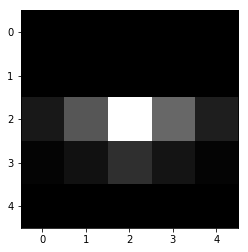

Accuracy:  46.56 %


Epoch  210 42.0 % complete...
Train loss:  0.11952188611030579 Validation score:  0.12428586930036545
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 207  715 2091  857  240]
 [  36  156  468  181   49]
 [   0    0    0    0    0]]


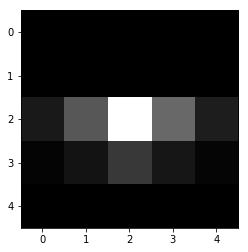

Accuracy:  45.44 %


Epoch  220 44.0 % complete...
Train loss:  0.11724968254566193 Validation score:  0.1217738464474678
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 188  714 2071  846  219]
 [  55  157  488  192   70]
 [   0    0    0    0    0]]


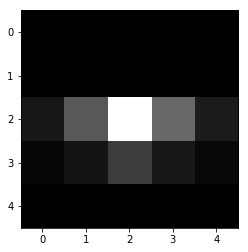

Accuracy:  45.26 %


Epoch  230 46.0 % complete...
Train loss:  0.11486700177192688 Validation score:  0.12180879712104797
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 191  681 1988  821  225]
 [  52  190  571  217   64]
 [   0    0    0    0    0]]


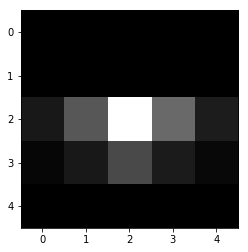

Accuracy:  44.1 %


Epoch  240 48.0 % complete...
Train loss:  0.11348146200180054 Validation score:  0.12007768452167511
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    6    1    0]
 [ 184  672 2034  834  230]
 [  59  199  519  203   59]
 [   0    0    0    0    0]]


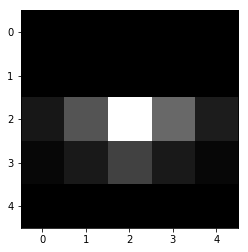

Accuracy:  44.74 %


Epoch  250 50.0 % complete...
Train loss:  0.11224567145109177 Validation score:  0.11943928152322769
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   2   10   19    8    2]
 [ 185  693 1976  795  212]
 [  56  168  564  235   75]
 [   0    0    0    0    0]]


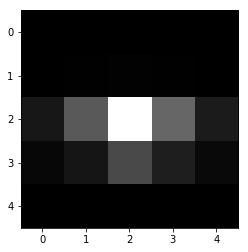

Accuracy:  44.42 %


Epoch  260 52.0 % complete...
Train loss:  0.11050119996070862 Validation score:  0.11898022145032883
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   9   17   50   10    5]
 [ 183  676 1946  787  214]
 [  51  178  563  241   70]
 [   0    0    0    0    0]]


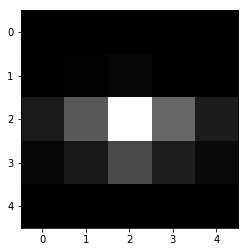

Accuracy:  44.08 %


Epoch  270 54.0 % complete...
Train loss:  0.10910097509622574 Validation score:  0.11533166468143463
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  10   29  115   42    6]
 [ 180  655 1892  771  209]
 [  53  187  552  225   74]
 [   0    0    0    0    0]]


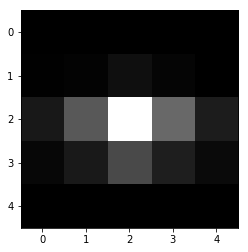

Accuracy:  42.92 %


Epoch  280 56.00000000000001 % complete...
Train loss:  0.10584454983472824 Validation score:  0.11433406919240952
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  18   58  162   66   15]
 [ 174  618 1884  772  219]
 [  51  195  513  200   55]
 [   0    0    0    0    0]]


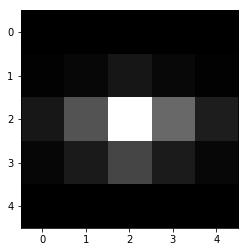

Accuracy:  42.84 %


Epoch  290 57.99999999999999 % complete...
Train loss:  0.10441625118255615 Validation score:  0.11432898044586182
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  17   88  214   80   23]
 [ 179  606 1838  747  202]
 [  47  177  507  211   64]
 [   0    0    0    0    0]]


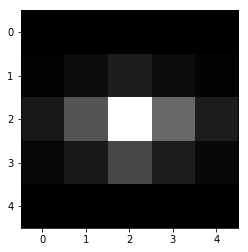

Accuracy:  42.74 %


Epoch  300 60.0 % complete...
Train loss:  0.10312644392251968 Validation score:  0.11419941484928131
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  28  102  293  107   25]
 [ 167  572 1740  728  195]
 [  48  197  526  203   69]
 [   0    0    0    0    0]]


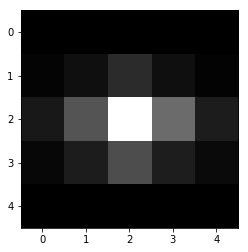

Accuracy:  40.9 %


Epoch  310 62.0 % complete...
Train loss:  0.10352994501590729 Validation score:  0.11316165328025818
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  25  114  264  124   38]
 [ 164  601 1766  697  190]
 [  54  156  529  217   61]
 [   0    0    0    0    0]]


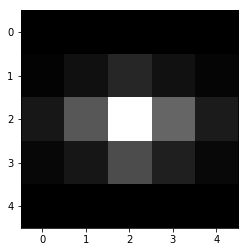

Accuracy:  41.94 %


Epoch  320 64.0 % complete...
Train loss:  0.09945223480463028 Validation score:  0.11161378026008606
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  33  131  337  134   35]
 [ 161  564 1722  691  191]
 [  49  176  500  213   63]
 [   0    0    0    0    0]]


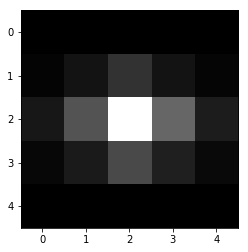

Accuracy:  41.32 %


Epoch  330 66.0 % complete...
Train loss:  0.0991237536072731 Validation score:  0.111761175096035
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  34  110  348  158   40]
 [ 160  584 1662  667  194]
 [  49  177  549  213   55]
 [   0    0    0    0    0]]


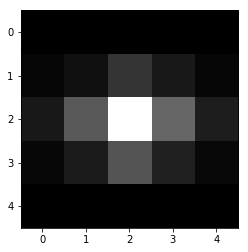

Accuracy:  39.7 %


Epoch  340 68.0 % complete...
Train loss:  0.09620040655136108 Validation score:  0.11201757937669754
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  41  122  352  152   43]
 [ 153  572 1694  675  189]
 [  49  177  511  210   57]
 [   0    0    2    1    0]]


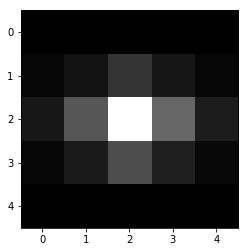

Accuracy:  40.52 %


Epoch  350 70.0 % complete...
Train loss:  0.09766533225774765 Validation score:  0.11004678905010223
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  33  113  344  151   27]
 [ 156  576 1691  667  185]
 [  54  182  523  219   77]
 [   0    0    1    1    0]]


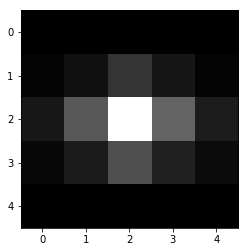

Accuracy:  40.46 %


Epoch  360 72.0 % complete...
Train loss:  0.09433811902999878 Validation score:  0.11168424785137177
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  30  117  415  152   51]
 [ 168  565 1607  679  172]
 [  45  189  531  205   65]
 [   0    0    6    2    1]]


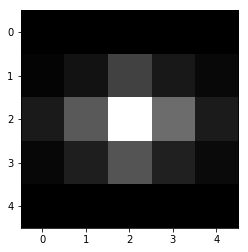

Accuracy:  38.6 %


Epoch  370 74.0 % complete...
Train loss:  0.0942842960357666 Validation score:  0.11049506813287735
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  32  136  398  166   37]
 [ 166  545 1597  645  183]
 [  45  190  560  224   67]
 [   0    0    4    3    2]]


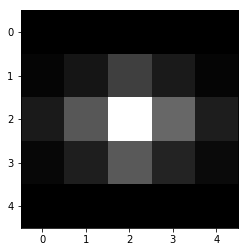

Accuracy:  39.18 %


Epoch  380 76.0 % complete...
Train loss:  0.09306976944208145 Validation score:  0.1090821698307991
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  39  145  400  169   41]
 [ 149  546 1592  657  178]
 [  54  174  558  211   68]
 [   1    6    9    1    2]]


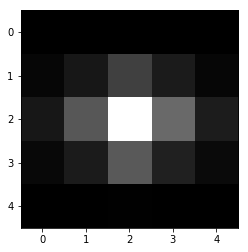

Accuracy:  39.0 %


Epoch  390 78.0 % complete...
Train loss:  0.09349869936704636 Validation score:  0.10725030303001404
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  42  158  426  160   56]
 [ 144  517 1595  632  173]
 [  55  190  525  236   56]
 [   2    6   13   10    4]]


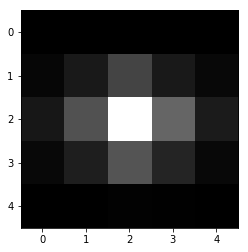

Accuracy:  39.86 %


Epoch  400 80.0 % complete...
Train loss:  0.09246496111154556 Validation score:  0.11071211099624634
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  27  117  403  166   44]
 [ 163  556 1606  638  177]
 [  52  188  525  220   61]
 [   1   10   25   14    7]]


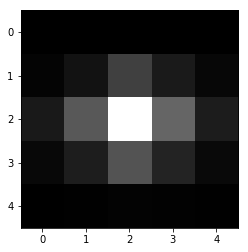

Accuracy:  39.0 %


Epoch  410 82.0 % complete...
Train loss:  0.0935380607843399 Validation score:  0.10931160300970078
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  45  146  431  148   50]
 [ 137  542 1572  656  187]
 [  59  173  520  217   47]
 [   2   10   36   17    5]]


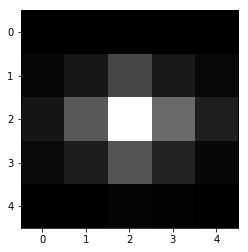

Accuracy:  38.8 %


Epoch  420 84.0 % complete...
Train loss:  0.09262973070144653 Validation score:  0.10898982733488083
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  46  155  429  172   54]
 [ 148  521 1574  637  181]
 [  43  186  519  206   52]
 [   6    9   37   23    2]]


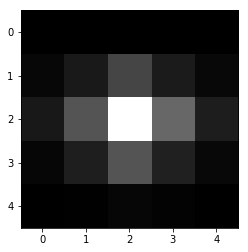

Accuracy:  38.74 %


Epoch  430 86.0 % complete...
Train loss:  0.0877835601568222 Validation score:  0.10854454338550568
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  40  153  414  182   47]
 [ 138  523 1576  617  187]
 [  58  178  532  225   50]
 [   7   17   37   14    5]]


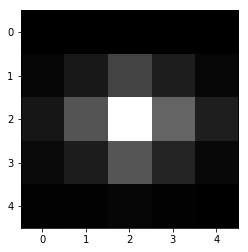

Accuracy:  39.18 %


Epoch  440 88.0 % complete...
Train loss:  0.0906815379858017 Validation score:  0.10911130160093307
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  29  148  447  175   44]
 [ 162  538 1542  640  189]
 [  49  174  524  199   51]
 [   3   11   46   24    5]]


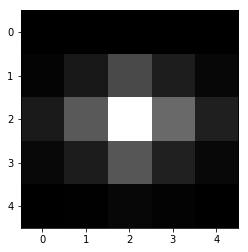

Accuracy:  37.88 %


Epoch  450 90.0 % complete...
Train loss:  0.0889291986823082 Validation score:  0.10811068117618561
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  55  164  426  170   55]
 [ 141  509 1551  619  165]
 [  42  190  541  238   61]
 [   5    8   41   11    8]]


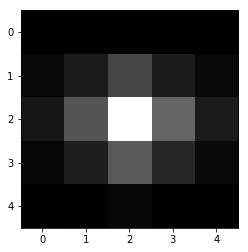

Accuracy:  39.22 %


Epoch  460 92.0 % complete...
Train loss:  0.08612310141324997 Validation score:  0.10830044001340866
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  36  145  443  170   51]
 [ 153  535 1545  618  179]
 [  49  171  511  226   54]
 [   5   20   60   24    5]]


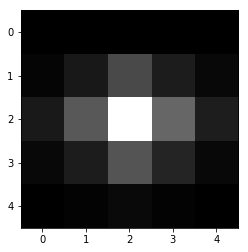

Accuracy:  38.42 %


Epoch  470 94.0 % complete...
Train loss:  0.08528905361890793 Validation score:  0.10624773800373077
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    1    1    0    0]
 [  37  147  456  170   53]
 [ 153  522 1501  635  155]
 [  45  188  542  219   78]
 [   8   13   59   14    3]]


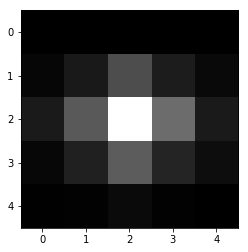

Accuracy:  37.4 %


Epoch  480 96.0 % complete...
Train loss:  0.08640900254249573 Validation score:  0.10833993554115295
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   1    0    2    1    0]
 [  44  152  421  192   47]
 [ 142  526 1528  601  193]
 [  54  182  547  226   46]
 [   2   11   61   18    3]]


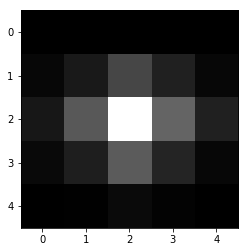

Accuracy:  38.2 %


Epoch  490 98.0 % complete...
Train loss:  0.08654868602752686 Validation score:  0.10683745890855789
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    2    6    2    1]
 [  47  148  434  185   64]
 [ 139  529 1504  616  158]
 [  48  168  542  211   62]
 [   9   24   73   24    4]]


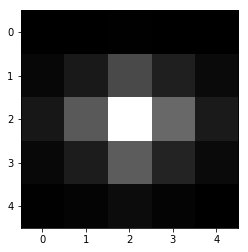

Accuracy:  37.34 %


Epoch  500 100.0 % complete...
Train loss:  0.08524488657712936 Validation score:  0.10437048226594925
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    4    5    2    1]
 [  47  148  429  178   51]
 [ 134  524 1520  625  173]
 [  51  174  530  215   56]
 [  11   21   75   18    8]]


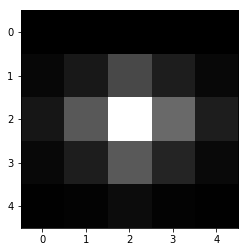

Accuracy:  37.82 %


Plotting the training and validation losses:


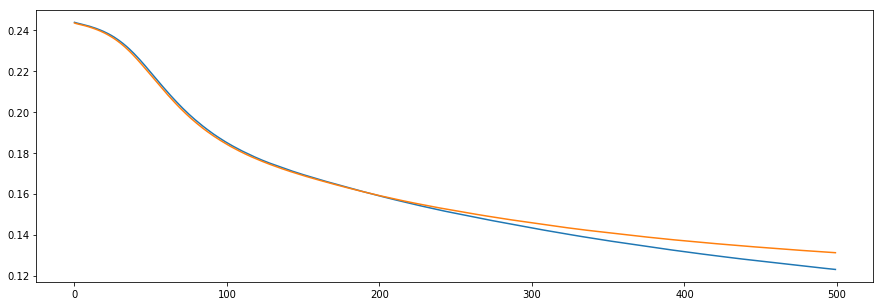

Test loss:  0.10704279690980911
Confusion Matrix: 
[[   69    35    11     2     0]
 [  989  2576  1364   307    67]
 [  285  2449 12844  2700   226]
 [   44   339  1563  3379  1170]
 [   10    38    71   301   373]]


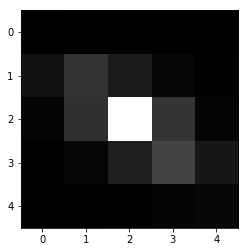

Accuracy:  61.6462 %


In [72]:
# using the entirety of the document term matrix dataset

mod_dtm0 = models(dtm, targ)
m0_dtm = run_batch(mod_dtm0, dtm, targ, lr=1e-4, epo=500)

Model structure:
Sequential(
  (0): Linear(in_features=7320, out_features=5000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5000, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=5, bias=True)
  (7): Sigmoid()
)
Shape of train set:  (19801, 7320) (19801, 5)
Shape of valid set:  (8487, 7320) (8487, 5)
Shape of test set:  (7072, 7320) (7072, 5)
Epoch  10 2.0 % complete...
Train loss:  0.23954342305660248 Validation score:  0.2386772483587265
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[705 659 701 737 705]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [298 290 306 303 296]
 [  0   0   0   0   0]]


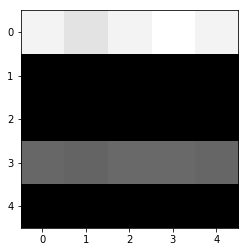

Accuracy:  20.16 %


Epoch  20 4.0 % complete...
Train loss:  0.2306511104106903 Validation score:  0.22918951511383057
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


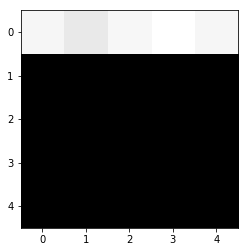

Accuracy:  20.06 %


Epoch  30 6.0 % complete...
Train loss:  0.21588197350502014 Validation score:  0.21406924724578857
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


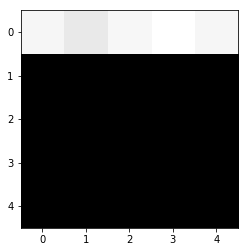

Accuracy:  20.06 %


Epoch  40 8.0 % complete...
Train loss:  0.1987781822681427 Validation score:  0.19669990241527557
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


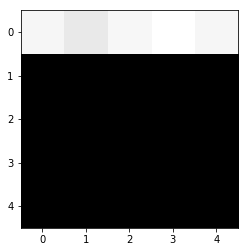

Accuracy:  20.06 %


Epoch  50 10.0 % complete...
Train loss:  0.18425261974334717 Validation score:  0.1836526095867157
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


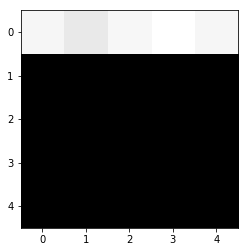

Accuracy:  20.06 %


Epoch  60 12.0 % complete...
Train loss:  0.17550282180309296 Validation score:  0.1750461459159851
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


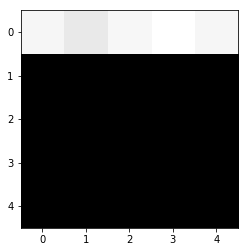

Accuracy:  20.06 %


Epoch  70 14.000000000000002 % complete...
Train loss:  0.17142854630947113 Validation score:  0.17188335955142975
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


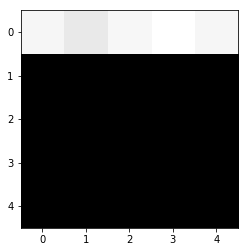

Accuracy:  20.06 %


Epoch  80 16.0 % complete...
Train loss:  0.16949911415576935 Validation score:  0.17006915807724
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


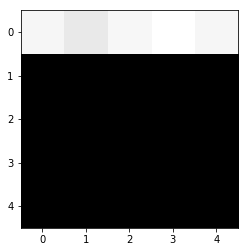

Accuracy:  20.06 %


Epoch  90 18.0 % complete...
Train loss:  0.1677471548318863 Validation score:  0.16823136806488037
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[ 994  946 1004 1030  993]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   9    3    3   10    8]
 [   0    0    0    0    0]]


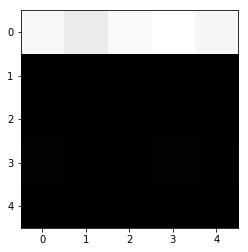

Accuracy:  20.08 %


Epoch  100 20.0 % complete...
Train loss:  0.16511958837509155 Validation score:  0.16637887060642242
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[901 851 903 935 898]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [100  95 101 101 101]
 [  2   3   3   4   2]]


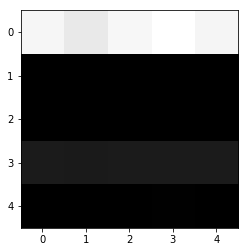

Accuracy:  20.08 %


Epoch  110 22.0 % complete...
Train loss:  0.16277442872524261 Validation score:  0.16410720348358154
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[802 749 793 820 785]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 56  49  53  48  63]
 [145 151 161 172 153]]


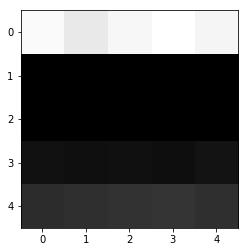

Accuracy:  20.06 %


Epoch  120 24.0 % complete...
Train loss:  0.1592966914176941 Validation score:  0.16114677488803864
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[658 624 669 680 659]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 47  33  32  40  26]
 [298 292 306 320 316]]


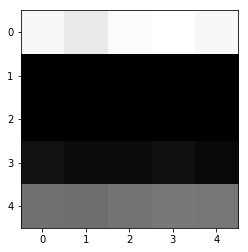

Accuracy:  20.28 %


Epoch  130 26.0 % complete...
Train loss:  0.15476858615875244 Validation score:  0.15739524364471436
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[631 585 618 629 601]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 62  68  70  73  72]
 [310 296 319 338 328]]


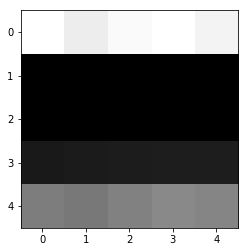

Accuracy:  20.64 %


Epoch  140 28.000000000000004 % complete...
Train loss:  0.14886760711669922 Validation score:  0.15185542404651642
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[601 572 599 628 610]
 [  0   0   1   0   1]
 [  0   0   0   0   0]
 [ 25  25  28  38  29]
 [377 352 379 374 361]]


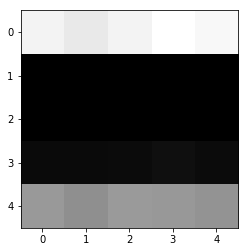

Accuracy:  20.0 %


Epoch  150 30.0 % complete...
Train loss:  0.1412951946258545 Validation score:  0.14658211171627045
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[574 549 599 623 581]
 [  1   3   1   0   1]
 [  0   0   0   0   0]
 [ 57  48  42  51  40]
 [371 349 365 366 379]]


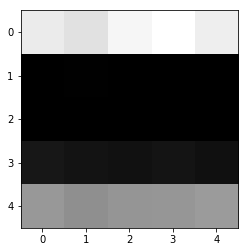

Accuracy:  20.14 %


Epoch  160 32.0 % complete...
Train loss:  0.1346144676208496 Validation score:  0.1410997062921524
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[555 499 543 577 526]
 [ 20  19  29  29  22]
 [  0   0   0   0   0]
 [110 104 110 121 115]
 [318 327 325 313 338]]


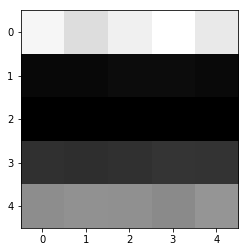

Accuracy:  20.66 %


Epoch  170 34.0 % complete...
Train loss:  0.12765812873840332 Validation score:  0.1372585892677307
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[365 354 354 402 389]
 [181 157 164 163 166]
 [  0   0   0   0   0]
 [147 156 162 160 156]
 [310 282 327 315 290]]


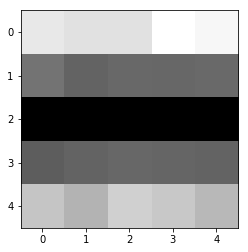

Accuracy:  19.44 %


Epoch  180 36.0 % complete...
Train loss:  0.12278910726308823 Validation score:  0.13368119299411774
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[310 281 309 314 309]
 [235 222 241 257 236]
 [  3   3   4   4   3]
 [196 181 173 190 189]
 [259 262 280 275 264]]


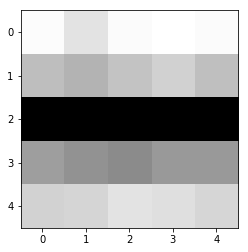

Accuracy:  19.8 %


Epoch  190 38.0 % complete...
Train loss:  0.11652541905641556 Validation score:  0.13175556063652039
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[242 241 252 256 259]
 [221 188 232 227 226]
 [ 79  72  79  79  64]
 [190 189 182 185 185]
 [271 259 262 293 267]]


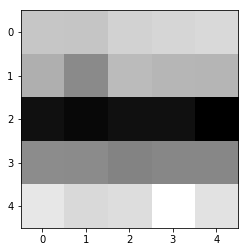

Accuracy:  19.22 %


Epoch  200 40.0 % complete...
Train loss:  0.1102883443236351 Validation score:  0.13008618354797363
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[257 253 256 264 240]
 [215 184 174 239 215]
 [103 106 123 109 105]
 [192 193 200 202 195]
 [236 213 254 226 246]]


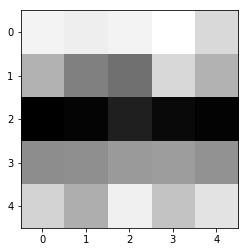

Accuracy:  20.24 %


Epoch  210 42.0 % complete...
Train loss:  0.10582448542118073 Validation score:  0.12851263582706451
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[226 235 243 267 233]
 [200 200 223 217 195]
 [133 122 120 109 115]
 [221 163 187 190 209]
 [223 229 234 257 249]]


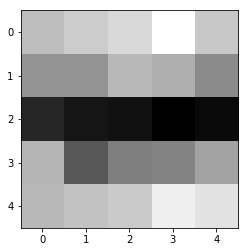

Accuracy:  19.7 %


Epoch  220 44.0 % complete...
Train loss:  0.10238918662071228 Validation score:  0.128712996840477
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[220 231 237 253 233]
 [217 181 218 201 226]
 [133 133 158 155 130]
 [190 184 180 204 178]
 [243 220 214 227 234]]


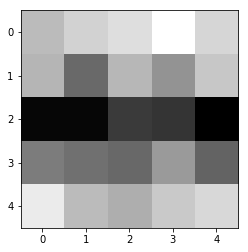

Accuracy:  19.94 %


Epoch  230 46.0 % complete...
Train loss:  0.09668684750795364 Validation score:  0.13039915263652802
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[210 225 245 240 222]
 [188 180 182 202 200]
 [171 181 162 180 188]
 [212 159 182 186 158]
 [222 204 236 232 233]]


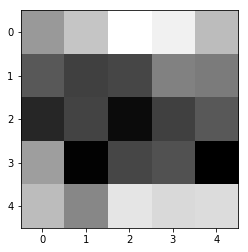

Accuracy:  19.42 %


Epoch  240 48.0 % complete...
Train loss:  0.09414082765579224 Validation score:  0.13007783889770508
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[205 212 206 248 229]
 [197 172 212 207 187]
 [181 175 194 162 191]
 [192 173 199 200 193]
 [228 217 196 223 201]]


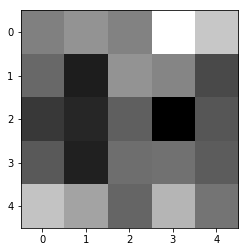

Accuracy:  19.44 %


Epoch  250 50.0 % complete...
Train loss:  0.09040356427431107 Validation score:  0.12801110744476318
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[190 198 219 218 232]
 [171 175 211 181 180]
 [226 208 185 207 179]
 [168 168 176 173 186]
 [248 200 216 261 224]]


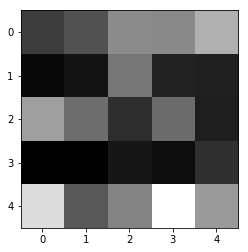

Accuracy:  18.94 %


Epoch  260 52.0 % complete...
Train loss:  0.08712616562843323 Validation score:  0.13038700819015503
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[222 211 204 213 225]
 [155 175 184 195 170]
 [236 193 241 216 234]
 [184 139 175 186 166]
 [206 231 203 230 206]]


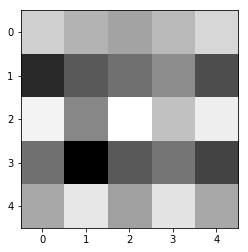

Accuracy:  20.6 %


Epoch  270 54.0 % complete...
Train loss:  0.08552605658769608 Validation score:  0.12995398044586182
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[226 193 213 209 224]
 [173 179 180 185 152]
 [213 217 234 261 220]
 [163 149 174 162 191]
 [228 211 206 223 214]]


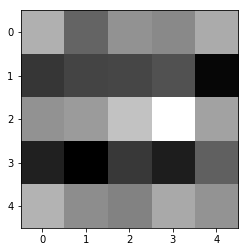

Accuracy:  20.3 %


Epoch  280 56.00000000000001 % complete...
Train loss:  0.08142876625061035 Validation score:  0.13191737234592438
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[212 203 220 189 204]
 [176 162 170 179 182]
 [229 235 217 244 225]
 [165 161 181 209 180]
 [221 188 219 219 210]]


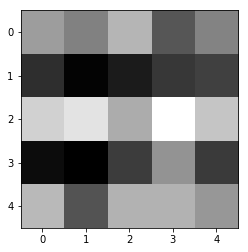

Accuracy:  20.2 %


Threshold reached after  280  iterations!
Training Complete after Early Stop!
Plotting the training and validation losses:


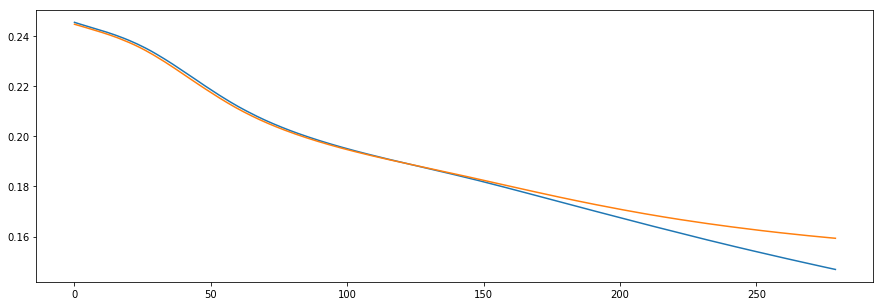

Test loss:  0.13110245764255524
Confusion Matrix: 
[[923 418 112  58  21]
 [303 520 254  89  24]
 [128 332 641 318 131]
 [ 32 114 277 493 366]
 [ 42  54  94 391 937]]


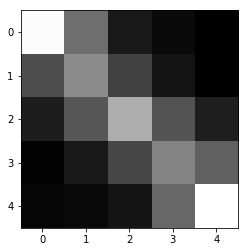

Accuracy:  49.6889 %


In [73]:
# using the balanced document term matrix dataset

mod_dtm1 = models(dtm_eq, targ_eq)
m1_dtm = run_batch(mod_dtm1, dtm_eq, targ_eq, lr=1e-4, epo=500)

Model structure:
Sequential(
  (0): Linear(in_features=7615, out_features=5000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5000, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=5, bias=True)
  (7): Sigmoid()
)
Shape of train set:  (87393, 7615) (87393, 5)
Shape of valid set:  (37455, 7615) (37455, 5)
Shape of test set:  (31212, 7615) (31212, 5)
Epoch  10 2.0 % complete...
Train loss:  0.24749650061130524 Validation score:  0.24722915887832642
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]]


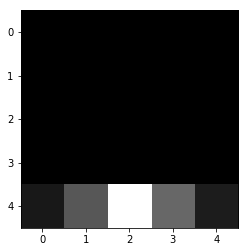

Accuracy:  5.78 %


Epoch  20 4.0 % complete...
Train loss:  0.24302634596824646 Validation score:  0.24240446090698242
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]]


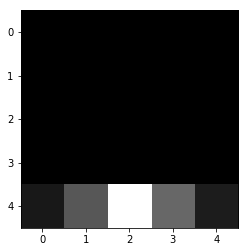

Accuracy:  5.78 %


Epoch  30 6.0 % complete...
Train loss:  0.23505297303199768 Validation score:  0.2339790016412735
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   3   28   68   32    7]
 [   0    0    0    0    0]
 [ 240  843 2491 1006  282]]


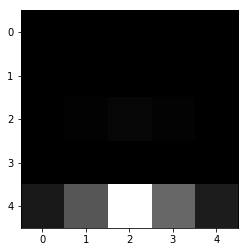

Accuracy:  7.0 %


Epoch  40 8.0 % complete...
Train loss:  0.22002941370010376 Validation score:  0.2180384248495102
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


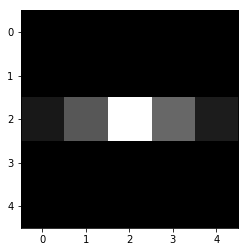

Accuracy:  51.18 %


Epoch  50 10.0 % complete...
Train loss:  0.19591467082500458 Validation score:  0.19348204135894775
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


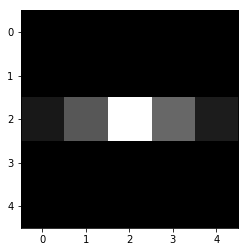

Accuracy:  51.18 %


Epoch  60 12.0 % complete...
Train loss:  0.168014258146286 Validation score:  0.16746999323368073
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


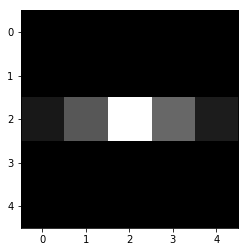

Accuracy:  51.18 %


Epoch  70 14.000000000000002 % complete...
Train loss:  0.1500645875930786 Validation score:  0.14733874797821045
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


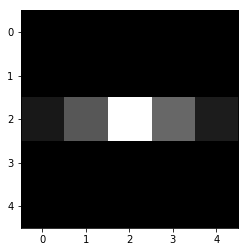

Accuracy:  51.18 %


Epoch  80 16.0 % complete...
Train loss:  0.14172051846981049 Validation score:  0.1411457359790802
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


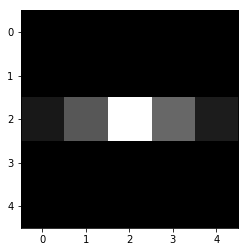

Accuracy:  51.18 %


Epoch  90 18.0 % complete...
Train loss:  0.13628296554088593 Validation score:  0.13770416378974915
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


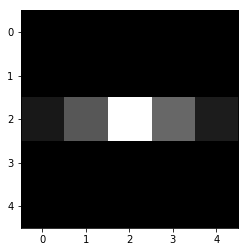

Accuracy:  51.18 %


Epoch  100 20.0 % complete...
Train loss:  0.13346076011657715 Validation score:  0.1352461725473404
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


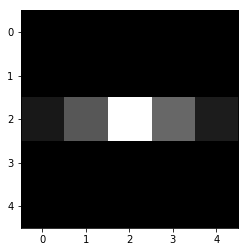

Accuracy:  51.18 %


Epoch  110 22.0 % complete...
Train loss:  0.13382938504219055 Validation score:  0.1345725655555725
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


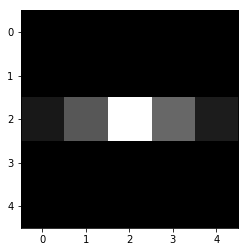

Accuracy:  51.18 %


Epoch  120 24.0 % complete...
Train loss:  0.13258565962314606 Validation score:  0.1348530501127243
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


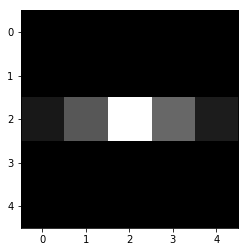

Accuracy:  51.18 %


Epoch  130 26.0 % complete...
Train loss:  0.13249456882476807 Validation score:  0.13315458595752716
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


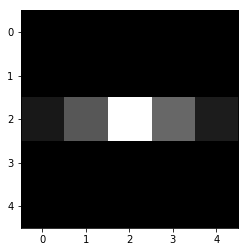

Accuracy:  51.18 %


Epoch  140 28.000000000000004 % complete...
Train loss:  0.12993057072162628 Validation score:  0.13376091420650482
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


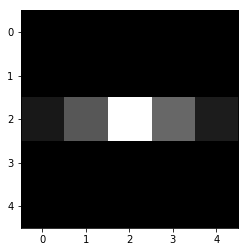

Accuracy:  51.18 %


Epoch  150 30.0 % complete...
Train loss:  0.1317325085401535 Validation score:  0.1324174553155899
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


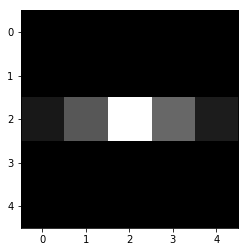

Accuracy:  51.18 %


Epoch  160 32.0 % complete...
Train loss:  0.1322760134935379 Validation score:  0.13285492360591888
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


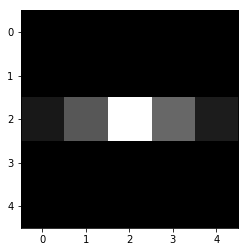

Accuracy:  51.18 %


Epoch  170 34.0 % complete...
Train loss:  0.1282891184091568 Validation score:  0.13067100942134857
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


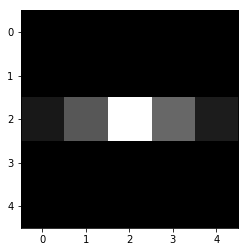

Accuracy:  51.18 %


Epoch  180 36.0 % complete...
Train loss:  0.1295662522315979 Validation score:  0.13183079659938812
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


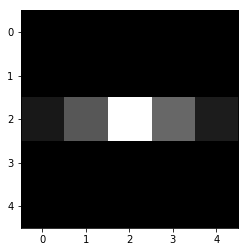

Accuracy:  51.18 %


Epoch  190 38.0 % complete...
Train loss:  0.1287909299135208 Validation score:  0.13033266365528107
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


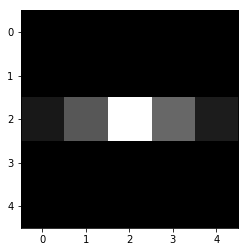

Accuracy:  51.18 %


Epoch  200 40.0 % complete...
Train loss:  0.12920351326465607 Validation score:  0.13030055165290833
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


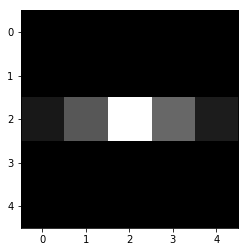

Accuracy:  51.18 %


Epoch  210 42.0 % complete...
Train loss:  0.12844616174697876 Validation score:  0.12973451614379883
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


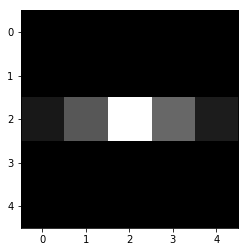

Accuracy:  51.18 %


Epoch  220 44.0 % complete...
Train loss:  0.12707294523715973 Validation score:  0.1296064555644989
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


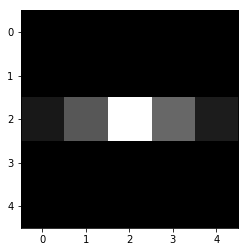

Accuracy:  51.18 %


Epoch  230 46.0 % complete...
Train loss:  0.12417466938495636 Validation score:  0.1283612698316574
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


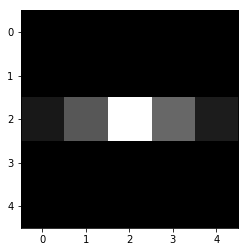

Accuracy:  51.18 %


Epoch  240 48.0 % complete...
Train loss:  0.1238030269742012 Validation score:  0.1258816123008728
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


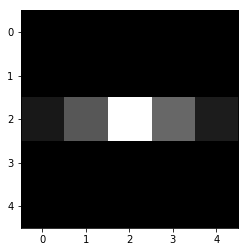

Accuracy:  51.18 %


Epoch  250 50.0 % complete...
Train loss:  0.12279953062534332 Validation score:  0.12562333047389984
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


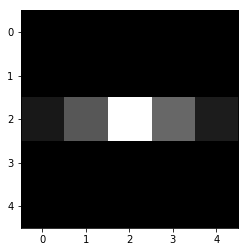

Accuracy:  51.18 %


Epoch  260 52.0 % complete...
Train loss:  0.12226370722055435 Validation score:  0.1258469820022583
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 243  871 2559 1038  289]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


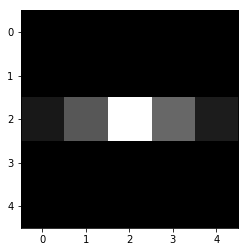

Accuracy:  51.18 %


Epoch  270 54.0 % complete...
Train loss:  0.11872594803571701 Validation score:  0.12423181533813477
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    1]
 [ 243  871 2559 1038  288]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


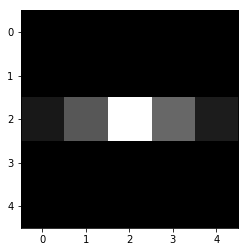

Accuracy:  51.18 %


Epoch  280 56.00000000000001 % complete...
Train loss:  0.11905640363693237 Validation score:  0.12280332297086716
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   2    6   15    4    2]
 [ 241  865 2544 1034  287]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


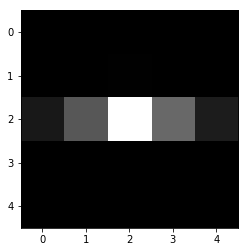

Accuracy:  51.0 %


Epoch  290 57.99999999999999 % complete...
Train loss:  0.11809130758047104 Validation score:  0.12221149355173111
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  12   27   99   25   13]
 [ 231  844 2460 1013  276]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


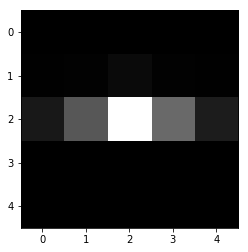

Accuracy:  49.74 %


Epoch  300 60.0 % complete...
Train loss:  0.11554540693759918 Validation score:  0.12013295292854309
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  12   66  199   93   26]
 [ 231  805 2360  945  263]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


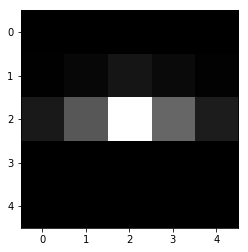

Accuracy:  48.52 %


Epoch  310 62.0 % complete...
Train loss:  0.11276151239871979 Validation score:  0.11887311190366745
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  35  123  307  119   31]
 [ 208  748 2252  919  258]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


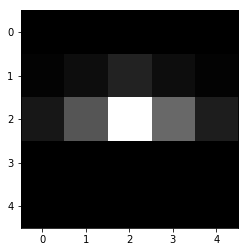

Accuracy:  47.5 %


Epoch  320 64.0 % complete...
Train loss:  0.11135506629943848 Validation score:  0.1203962191939354
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  39  158  452  176   58]
 [ 204  713 2107  862  231]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


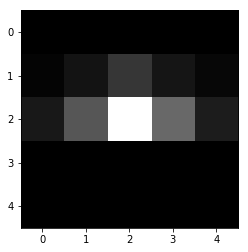

Accuracy:  45.3 %


Epoch  330 66.0 % complete...
Train loss:  0.11307095736265182 Validation score:  0.11862686276435852
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  34  161  535  197   47]
 [ 209  710 2024  841  242]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


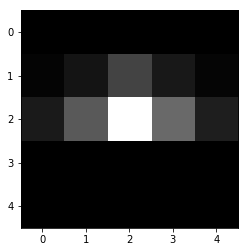

Accuracy:  43.7 %


Epoch  340 68.0 % complete...
Train loss:  0.1099134311079979 Validation score:  0.11799083650112152
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  63  168  465  203   52]
 [ 180  703 2094  835  237]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


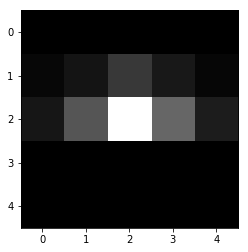

Accuracy:  45.24 %


Epoch  350 70.0 % complete...
Train loss:  0.11017117649316788 Validation score:  0.11924353241920471
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  60  153  600  217   64]
 [ 183  718 1959  821  225]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


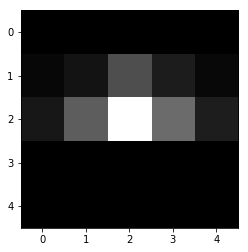

Accuracy:  42.24 %


Epoch  360 72.0 % complete...
Train loss:  0.10897497087717056 Validation score:  0.11927192658185959
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  54  183  542  239   50]
 [ 189  688 2017  799  239]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


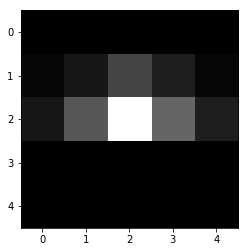

Accuracy:  44.0 %


Epoch  370 74.0 % complete...
Train loss:  0.10999484360218048 Validation score:  0.11984920501708984
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  75  219  632  258   64]
 [ 168  652 1927  780  225]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


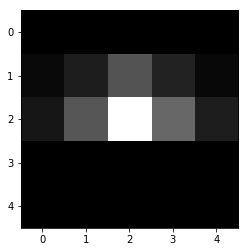

Accuracy:  42.92 %


Epoch  380 76.0 % complete...
Train loss:  0.10782510042190552 Validation score:  0.11740350723266602
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  58  214  576  228   58]
 [ 185  654 1980  808  231]
 [   0    3    3    2    0]
 [   0    0    0    0    0]]


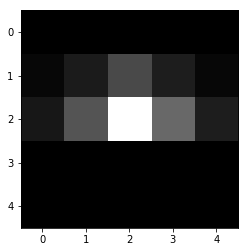

Accuracy:  43.92 %


Epoch  390 78.0 % complete...
Train loss:  0.10815340280532837 Validation score:  0.11661708354949951
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  59  201  632  277   79]
 [ 184  663 1915  758  210]
 [   0    7   12    3    0]
 [   0    0    0    0    0]]


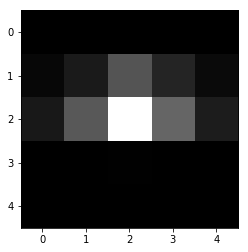

Accuracy:  42.38 %


Epoch  400 80.0 % complete...
Train loss:  0.10735640674829483 Validation score:  0.11646203696727753
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  68  190  592  256   68]
 [ 173  651 1897  757  208]
 [   2   30   70   25   13]
 [   0    0    0    0    0]]


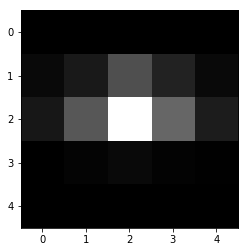

Accuracy:  42.24 %


Epoch  410 82.0 % complete...
Train loss:  0.10649185627698898 Validation score:  0.11699721217155457
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  46  211  534  236   72]
 [ 184  618 1912  753  205]
 [  13   42  113   49   12]
 [   0    0    0    0    0]]


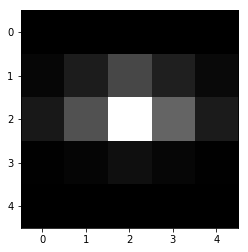

Accuracy:  43.44 %


Epoch  420 84.0 % complete...
Train loss:  0.10368775576353073 Validation score:  0.11913494765758514
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  35  196  537  203   70]
 [ 189  616 1835  768  198]
 [  19   59  187   67   21]
 [   0    0    0    0    0]]


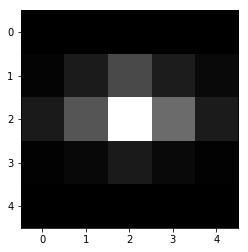

Accuracy:  41.96 %


Epoch  430 86.0 % complete...
Train loss:  0.10679008811712265 Validation score:  0.1159181222319603
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  57  164  555  219   52]
 [ 163  633 1795  730  209]
 [  23   74  209   89   28]
 [   0    0    0    0    0]]


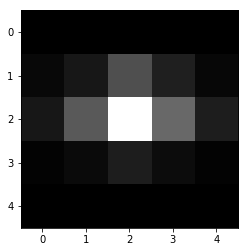

Accuracy:  40.96 %


Epoch  440 88.0 % complete...
Train loss:  0.10431292653083801 Validation score:  0.11713163554668427
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  61  148  518  219   49]
 [ 160  635 1787  712  214]
 [  22   88  254  107   26]
 [   0    0    0    0    0]]


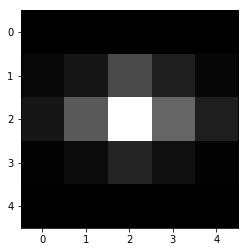

Accuracy:  40.84 %


Epoch  450 90.0 % complete...
Train loss:  0.10599226504564285 Validation score:  0.11617442965507507
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  46  152  471  234   51]
 [ 169  625 1793  696  201]
 [  28   94  295  108   37]
 [   0    0    0    0    0]]


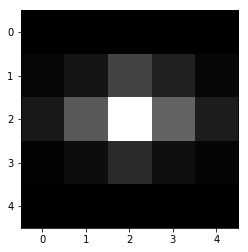

Accuracy:  41.06 %


Epoch  460 92.0 % complete...
Train loss:  0.10360219329595566 Validation score:  0.11537235975265503
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  47  144  505  189   46]
 [ 157  600 1751  733  209]
 [  39  127  303  116   34]
 [   0    0    0    0    0]]


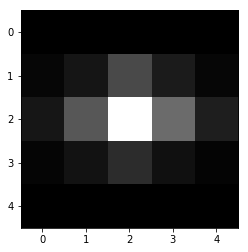

Accuracy:  40.22 %


Epoch  470 94.0 % complete...
Train loss:  0.10456523299217224 Validation score:  0.11638244241476059
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  53  167  512  206   45]
 [ 156  579 1700  702  207]
 [  34  125  347  130   37]
 [   0    0    0    0    0]]


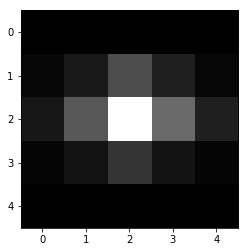

Accuracy:  39.94 %


Epoch  480 96.0 % complete...
Train loss:  0.10297301411628723 Validation score:  0.11315827071666718
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  55  143  429  171   54]
 [ 154  595 1770  725  187]
 [  34  133  360  142   48]
 [   0    0    0    0    0]]


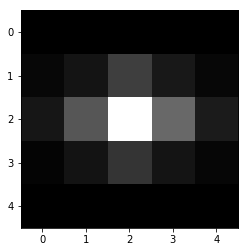

Accuracy:  41.1 %


Epoch  490 98.0 % complete...
Train loss:  0.10185284912586212 Validation score:  0.11834385246038437
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  45  150  437  203   43]
 [ 160  586 1732  684  195]
 [  38  135  390  151   51]
 [   0    0    0    0    0]]


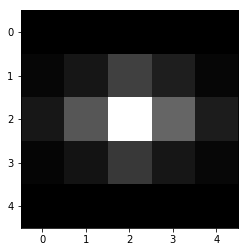

Accuracy:  40.66 %


Epoch  500 100.0 % complete...
Train loss:  0.10357688367366791 Validation score:  0.11444444954395294
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [  45  138  407  151   44]
 [ 154  603 1692  700  196]
 [  44  130  460  187   49]
 [   0    0    0    0    0]]


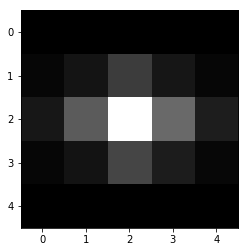

Accuracy:  40.34 %


Plotting the training and validation losses:


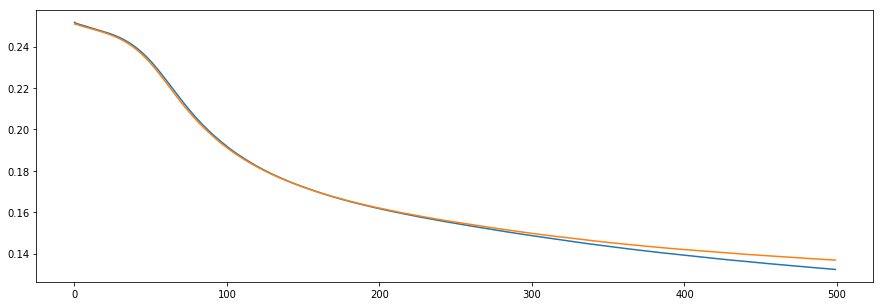

Test loss:  0.11535059660673141
Confusion Matrix: 
[[    0     0     0     0     0]
 [  961  2155  1185   618   346]
 [  301  2635 13548  3709   426]
 [  135   647  1120  2362  1064]
 [    0     0     0     0     0]]


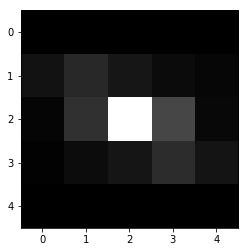

Accuracy:  57.8784 %


In [70]:
# using the entirety of the term frequency dataset

mod_tf0 = models(tf, targ)
m0_tf = run_batch(mod_tf0, tf, targ, lr=1e-4, epo=500)

Model structure:
Sequential(
  (0): Linear(in_features=7477, out_features=5000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5000, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=5, bias=True)
  (7): Sigmoid()
)
Shape of train set:  (19801, 7477) (19801, 5)
Shape of valid set:  (8487, 7477) (8487, 5)
Shape of test set:  (7072, 7477) (7072, 5)
Epoch  10 2.0 % complete...
Train loss:  0.24375861883163452 Validation score:  0.24365855753421783
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


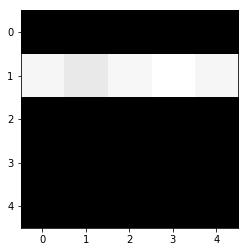

Accuracy:  18.98 %


Epoch  20 4.0 % complete...
Train loss:  0.24084770679473877 Validation score:  0.24055227637290955
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


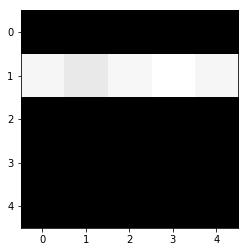

Accuracy:  18.98 %


Epoch  30 6.0 % complete...
Train loss:  0.23610429465770721 Validation score:  0.23573076725006104
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


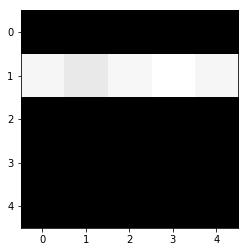

Accuracy:  18.98 %


Epoch  40 8.0 % complete...
Train loss:  0.22766685485839844 Validation score:  0.22666813433170319
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


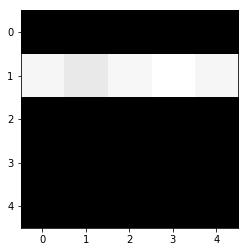

Accuracy:  18.98 %


Epoch  50 10.0 % complete...
Train loss:  0.21256707608699799 Validation score:  0.2108338326215744
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[  0   0   0   0   0]
 [924 871 937 960 924]
 [ 79  78  70  80  77]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


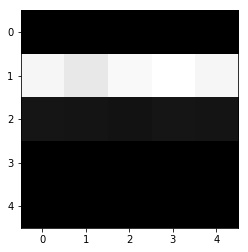

Accuracy:  18.82 %


Epoch  60 12.0 % complete...
Train loss:  0.19068582355976105 Validation score:  0.18862363696098328
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[  0   0   0   0   0]
 [ 39  46  44  43  36]
 [964 903 963 997 965]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


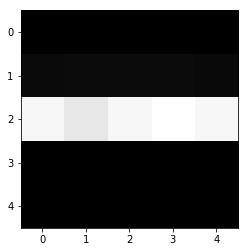

Accuracy:  20.18 %


Epoch  70 14.000000000000002 % complete...
Train loss:  0.17012819647789001 Validation score:  0.16885757446289062
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


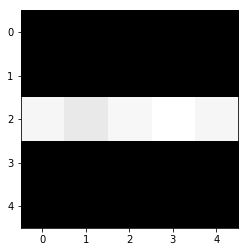

Accuracy:  20.14 %


Epoch  80 16.0 % complete...
Train loss:  0.16209816932678223 Validation score:  0.1622675359249115
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [1003  949 1007 1040 1001]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


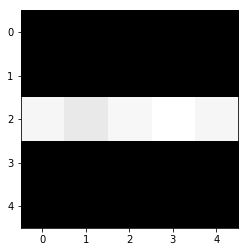

Accuracy:  20.14 %


Epoch  90 18.0 % complete...
Train loss:  0.16228273510932922 Validation score:  0.16233132779598236
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[  0   0   0   0   0]
 [ 79  77  73  85  80]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [924 872 934 955 921]]


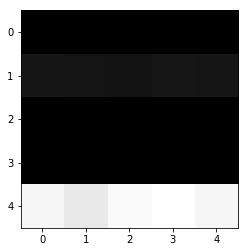

Accuracy:  19.96 %


Epoch  100 20.0 % complete...
Train loss:  0.16183708608150482 Validation score:  0.16192331910133362
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[  0   0   0   3   1]
 [182 173 182 183 179]
 [  0   0   0   0   0]
 [652 646 650 677 666]
 [169 130 175 177 155]]


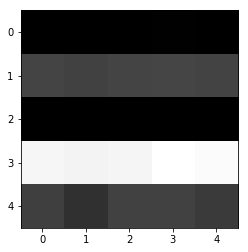

Accuracy:  20.1 %


Epoch  110 22.0 % complete...
Train loss:  0.16136319935321808 Validation score:  0.16157779097557068
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[ 12  17  11  10  10]
 [305 311 297 287 276]
 [  0   0   0   0   0]
 [686 621 699 743 715]
 [  0   0   0   0   0]]


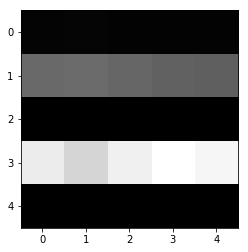

Accuracy:  21.32 %


Epoch  120 24.0 % complete...
Train loss:  0.16117286682128906 Validation score:  0.1614760458469391
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[116 131 122 125 129]
 [229 217 275 246 228]
 [  0   0   0   0   0]
 [658 601 610 669 644]
 [  0   0   0   0   0]]


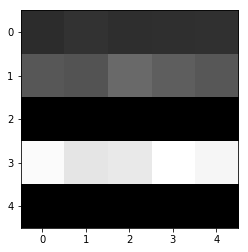

Accuracy:  20.04 %


Epoch  130 26.0 % complete...
Train loss:  0.16088557243347168 Validation score:  0.16127195954322815
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[291 262 268 293 275]
 [173 173 157 182 198]
 [  0   0   0   0   0]
 [539 514 582 565 528]
 [  0   0   0   0   0]]


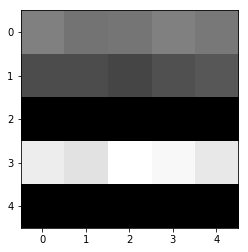

Accuracy:  20.58 %


Epoch  140 28.000000000000004 % complete...
Train loss:  0.16072392463684082 Validation score:  0.16112452745437622
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[173 173 180 194 173]
 [301 302 276 317 296]
 [  0   0   0   0   0]
 [528 474 549 527 532]
 [  1   0   2   2   0]]


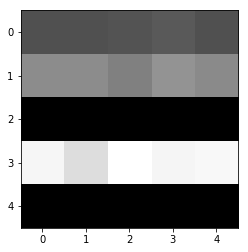

Accuracy:  20.04 %


Epoch  150 30.0 % complete...
Train loss:  0.16048958897590637 Validation score:  0.16089890897274017
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[520 461 489 544 508]
 [269 267 264 285 241]
 [  0   0   0   0   0]
 [151 170 183 160 182]
 [ 63  51  71  51  70]]


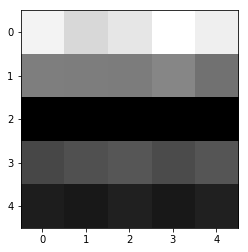

Accuracy:  20.34 %


Epoch  160 32.0 % complete...
Train loss:  0.1602284163236618 Validation score:  0.16070812940597534
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[449 430 474 499 455]
 [174 159 168 169 158]
 [  0   0   0   0   0]
 [379 360 365 372 388]
 [  1   0   0   0   0]]


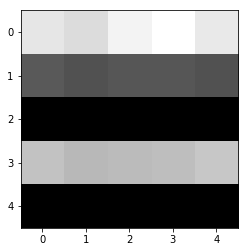

Accuracy:  19.6 %


Epoch  170 34.0 % complete...
Train loss:  0.1598203331232071 Validation score:  0.1604149043560028
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[350 328 376 360 376]
 [125 127 137 130 136]
 [  0   0   0   0   0]
 [528 494 494 550 489]
 [  0   0   0   0   0]]


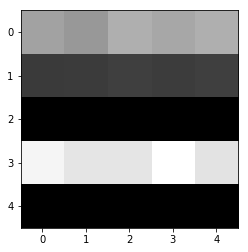

Accuracy:  20.54 %


Epoch  180 36.0 % complete...
Train loss:  0.159272238612175 Validation score:  0.15998490154743195
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[436 445 423 449 421]
 [147 125 147 165 133]
 [  0   0   0   0   0]
 [417 377 436 426 444]
 [  3   2   1   0   3]]


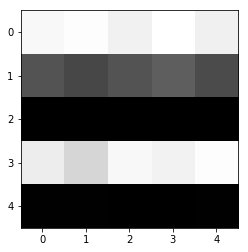

Accuracy:  19.8 %


Epoch  190 38.0 % complete...
Train loss:  0.15836289525032043 Validation score:  0.15943613648414612
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[545 519 529 532 537]
 [271 252 262 302 277]
 [  0   0   0   0   0]
 [143 127 158 161 139]
 [ 44  51  58  45  48]]


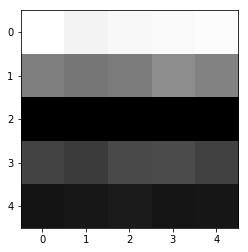

Accuracy:  20.12 %


Epoch  200 40.0 % complete...
Train loss:  0.15744377672672272 Validation score:  0.15851935744285583
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[601 557 622 644 599]
 [166 156 141 150 172]
 [  1   1   1   2   1]
 [  6   4   6   6   5]
 [229 231 237 238 224]]


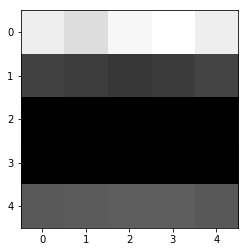

Accuracy:  19.76 %


Epoch  210 42.0 % complete...
Train loss:  0.1553204208612442 Validation score:  0.1570131480693817
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[586 580 603 640 635]
 [ 68  42  55  39  48]
 [ 10  15  16  20   8]
 [  4   2   1   2   3]
 [335 310 332 339 307]]


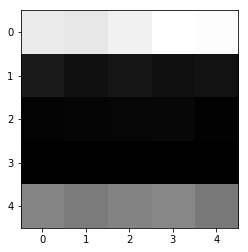

Accuracy:  19.06 %


Epoch  220 44.0 % complete...
Train loss:  0.15296949446201324 Validation score:  0.15529201924800873
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[534 471 512 533 514]
 [ 89 115 128 119  99]
 [  6  10  11   7  10]
 [  3   7   7   7   6]
 [371 346 349 374 372]]


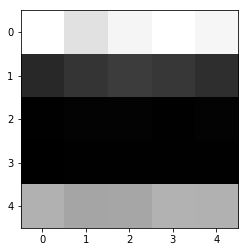

Accuracy:  20.78 %


Epoch  230 46.0 % complete...
Train loss:  0.14959946274757385 Validation score:  0.15339459478855133
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[501 455 488 514 454]
 [142 138 141 140 167]
 [  1   2   3   3   2]
 [ 24  12  12  13  11]
 [335 342 363 370 367]]


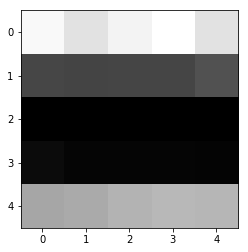

Accuracy:  20.44 %


Epoch  240 48.0 % complete...
Train loss:  0.14571548998355865 Validation score:  0.15092416107654572
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[439 390 440 456 434]
 [ 64  74  62  58  58]
 [ 10   9  12   9  14]
 [  0   2   3   2   1]
 [490 474 490 515 494]]


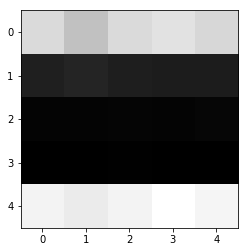

Accuracy:  20.42 %


Epoch  250 50.0 % complete...
Train loss:  0.14260178804397583 Validation score:  0.14896000921726227
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[376 377 388 402 401]
 [  1   5   2   0   1]
 [ 23  24  17  12  14]
 [  5   6  11   7  16]
 [598 537 589 619 569]]


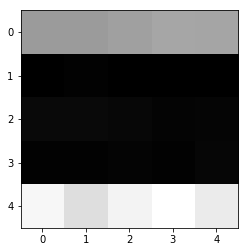

Accuracy:  19.48 %


Epoch  260 52.0 % complete...
Train loss:  0.13902679085731506 Validation score:  0.14727750420570374
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[358 340 382 389 386]
 [  0   0   0   0   0]
 [109  95  92 106 105]
 [ 44  51  40  41  41]
 [492 463 493 504 469]]


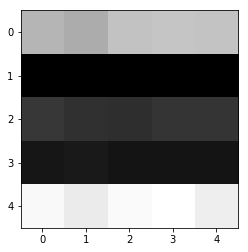

Accuracy:  19.2 %


Epoch  270 54.0 % complete...
Train loss:  0.13732537627220154 Validation score:  0.14576399326324463
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[356 344 358 399 357]
 [  0   1   1   2   0]
 [127 128 125 130 147]
 [ 47  51  51  51  44]
 [473 425 472 458 453]]


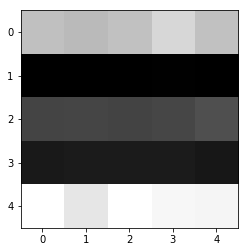

Accuracy:  19.72 %


Epoch  280 56.00000000000001 % complete...
Train loss:  0.1333879679441452 Validation score:  0.14434237778186798
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[314 359 352 366 354]
 [ 11   7   9  12   8]
 [136 120 130 130 132]
 [ 40  42  46  36  42]
 [502 421 470 496 465]]


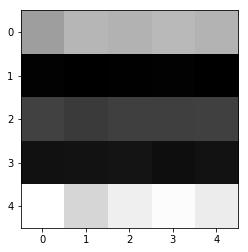

Accuracy:  19.04 %


Epoch  290 57.99999999999999 % complete...
Train loss:  0.1309746950864792 Validation score:  0.14283967018127441
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[346 312 355 349 331]
 [ 17  22  25  29  34]
 [118 115 124 129 127]
 [ 91  89  71  96  75]
 [431 411 432 437 434]]


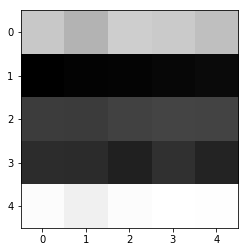

Accuracy:  20.44 %


Epoch  300 60.0 % complete...
Train loss:  0.12910152971744537 Validation score:  0.14112216234207153
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[354 326 306 347 338]
 [ 29  25  39  30  30]
 [137 143 108 137 132]
 [ 72  63  68  76  75]
 [411 392 486 450 426]]


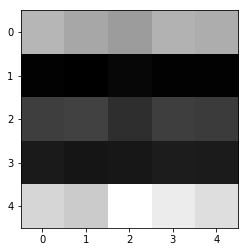

Accuracy:  19.78 %


Epoch  310 62.0 % complete...
Train loss:  0.12516172230243683 Validation score:  0.13902530074119568
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[341 312 339 343 325]
 [ 36  32  43  35  38]
 [179 152 174 178 172]
 [ 89  90 107 108  99]
 [358 363 344 376 367]]


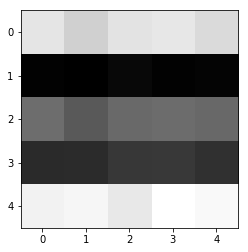

Accuracy:  20.44 %


Epoch  320 64.0 % complete...
Train loss:  0.12063892185688019 Validation score:  0.13710540533065796
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[329 297 337 315 339]
 [ 55  62  62  76  66]
 [194 172 161 187 179]
 [ 97  96  93 103  98]
 [328 322 354 359 319]]


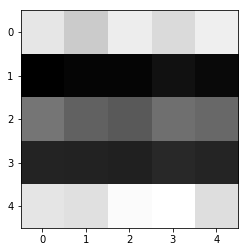

Accuracy:  19.48 %


Epoch  330 66.0 % complete...
Train loss:  0.1170741394162178 Validation score:  0.13587911427021027
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[296 295 306 304 312]
 [105  79  92 101  83]
 [209 185 241 239 198]
 [ 81  79  88  90  89]
 [312 311 280 306 319]]


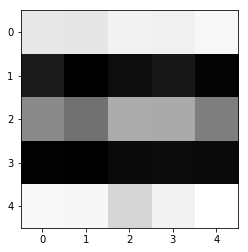

Accuracy:  20.5 %


Epoch  340 68.0 % complete...
Train loss:  0.1125989556312561 Validation score:  0.13358330726623535
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[275 269 311 288 278]
 [ 93 119 113 113 120]
 [257 217 201 262 246]
 [ 82  77  84  85  78]
 [296 267 298 292 279]]


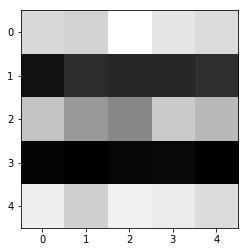

Accuracy:  19.18 %


Epoch  350 70.0 % complete...
Train loss:  0.10886477679014206 Validation score:  0.13106338679790497
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[287 242 278 279 267]
 [134 121 118 166 140]
 [196 229 243 226 218]
 [ 98  97 105  92  95]
 [288 260 263 277 281]]


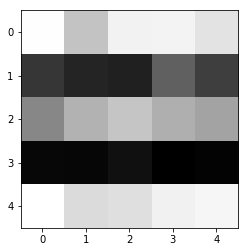

Accuracy:  20.48 %


Epoch  360 72.0 % complete...
Train loss:  0.10323967784643173 Validation score:  0.1311500519514084
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[266 241 277 257 243]
 [123 136 134 158 148]
 [239 215 206 235 238]
 [113 116 116 123 123]
 [262 241 274 267 249]]


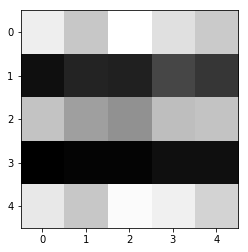

Accuracy:  19.6 %


Epoch  370 74.0 % complete...
Train loss:  0.09960093349218369 Validation score:  0.12958835065364838
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[247 236 235 258 267]
 [162 147 163 161 150]
 [227 216 201 229 224]
 [115 134 150 133 132]
 [252 216 258 259 228]]


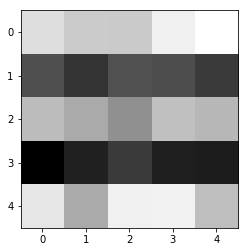

Accuracy:  19.12 %


Epoch  380 76.0 % complete...
Train loss:  0.09441371262073517 Validation score:  0.12890902161598206
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[241 230 247 249 248]
 [194 136 157 172 173]
 [197 193 214 223 194]
 [148 159 152 158 158]
 [223 231 237 238 228]]


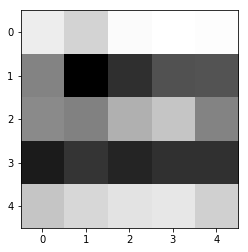

Accuracy:  19.54 %


Epoch  390 78.0 % complete...
Train loss:  0.08996396511793137 Validation score:  0.13131842017173767
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[248 236 236 248 234]
 [157 146 146 183 178]
 [230 189 226 204 203]
 [160 177 178 177 181]
 [208 201 221 228 205]]


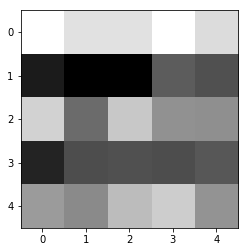

Accuracy:  20.04 %


Epoch  400 80.0 % complete...
Train loss:  0.08660709112882614 Validation score:  0.1310206651687622
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[221 208 231 255 239]
 [184 165 179 181 186]
 [189 186 187 186 193]
 [187 176 200 193 179]
 [222 214 210 225 204]]


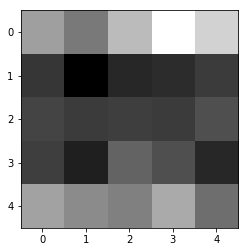

Accuracy:  19.4 %


Epoch  410 82.0 % complete...
Train loss:  0.08296255022287369 Validation score:  0.13116949796676636
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[248 209 231 257 205]
 [186 182 188 171 185]
 [197 166 196 201 191]
 [173 178 176 177 182]
 [199 214 216 234 238]]


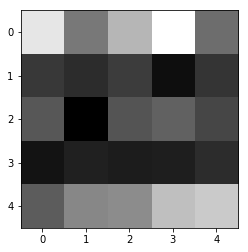

Accuracy:  20.82 %


Epoch  420 84.0 % complete...
Train loss:  0.07928505539894104 Validation score:  0.13277390599250793
torch.Size([5000, 5]) torch.Size([5000, 5])
Confusion Matrix: 
[[212 228 208 233 224]
 [182 163 174 183 189]
 [189 162 193 213 172]
 [208 179 207 185 202]
 [212 217 225 226 214]]


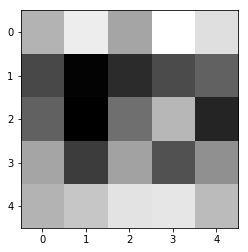

Accuracy:  19.34 %


Threshold reached after  420  iterations!
Training Complete after Early Stop!
Plotting the training and validation losses:


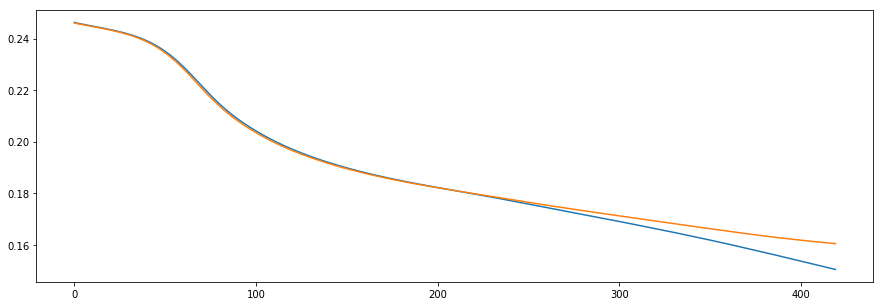

Test loss:  0.1338099092245102
Confusion Matrix: 
[[900 466 153  72  27]
 [326 486 259 115  75]
 [107 295 535 251  94]
 [ 66 134 291 494 369]
 [ 29  57 140 417 914]]


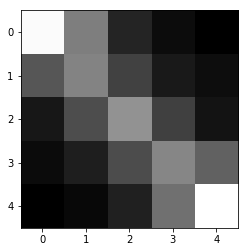

Accuracy:  47.073 %


In [71]:
# using the balanced term frequency dataset

mod_tf1 = models(tf_eq, targ_eq)
m1_tf = run_batch(mod_tf1, tf_eq, targ_eq, lr=1e-4, epo=500)